<a href="https://colab.research.google.com/github/sohag-mbstu-ict/ANN_Bank_Loan/blob/master/Faster_R_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#The more commonly used region proposal algorithms are selective search [3] and edge boxes

In [ ]:
#http://sites.science.oregonstate.edu/math/home/programs/undergrad/CalculusQuestStudyGuides/vcalc/system/system.html#:~:text=A%20nxn%20homogeneous%20system%20of,an%20infinite%20number%20of%20solutions.
#https://chbe241.github.io/Module-0-Introduction/MATH-152/Unique%20Solution,%20No%20Solution,%20or%20Infinite%20Solutions.html


In [ ]:

##############  anchor and bounding box ####################
#https://www.quora.com/How-does-the-region-proposal-network-RPN-in-Faster-R-CNN-work?share=1
#https://colab.research.google.com/github/d2l-ai/d2l-tensorflow-colab/blob/master/chapter_computer-vision/bounding-box.ipynb
#https://colab.research.google.com/github/d2l-ai/d2l-en-colab/blob/master/chapter_computer-vision/anchor.ipynb#scrollTo=Jp-oq8766uyO


In [ ]:
from google.colab import drive
drive.mount('/Faster_R-CNN')

Drive already mounted at /Faster_R-CNN; to attempt to forcibly remount, call drive.mount("/Faster_R-CNN", force_remount=True).


In [ ]:
import cv2
import csv
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
import random
from skimage import io
from shutil import copyfile
import sys
import time

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
annotations_bbox =pd.read_csv('/Faster_R-CNN/MyDrive/faster_RCNN/train-annotations-bbox.csv')

In [ ]:
images_boxable=pd.read_csv('/Faster_R-CNN/MyDrive/faster_RCNN/train-images-boxable-with-rotation.csv')
#images_boxable.head()

In [ ]:
class_descriptions =pd.read_csv('/Faster_R-CNN/MyDrive/faster_RCNN/class-descriptions-boxable.csv',header=None)
class_descriptions.shape

(601, 2)

In [ ]:
images_boxable['OriginalURL'].index

RangeIndex(start=0, stop=1743042, step=1)

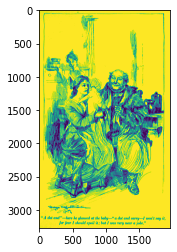

In [ ]:
url=images_boxable['OriginalURL'].values[2]
img=io.imread(url)
plt.imshow(img)
image_id=images_boxable.loc[images_boxable['OriginalURL']==url]['ImageID'].values[0]
bbox_image_id=annotations_bbox.loc[annotations_bbox['ImageID']==image_id]

In [ ]:
import pandas as pd 
# Creating a data frame 
df = pd.DataFrame([['Animal', 'Baby', 'Cat', 'Dog', 
					'Elephant', 'Frog', 'Gragor']]) 
# Itering over the data frame rows 
# using df.iterrows() 
itr = next(df.iterrows())[1] 
itr 

0      Animal
1        Baby
2         Cat
3         Dog
4    Elephant
5        Frog
6      Gragor
Name: 0, dtype: object

In [ ]:
# Code for plotting bounding box
def plot_bbox(img_id):
  #...['OriginalURL'].values[0] #: images_boxable er OriginalURL column er o index a je value thakbe ta bojatse
  img_url = images_boxable.loc[images_boxable["ImageID"]==img_id]['OriginalURL'].values[0]
  #http://man.hubwiz.com/docset/Scikit-image.docset/Contents/Resources/Documents/api/skimage.io.html
  #	Load an image from file.
  img = io.imread(img_url)
  height, width, channel = img.shape
  print(f"Image: {img.shape}")
  bboxs = annotations_bbox.loc[annotations_bbox['ImageID']==img_id]
  for index, row in bboxs.iterrows():
      xmin = row['XMin']
      xmax = row['XMax']
      ymin = row['YMin']
      ymax = row['YMax']
      xmin = int(xmin*width)
      xmax = int(xmax*width)
      ymin = int(ymin*height)
      ymax = int(ymax*height)
      label_name = row['LabelName']
      class_series = class_descriptions.loc[class_descriptions[0]==label_name]
      #class_descriptions er 1 number column er value jeta hote just tar right side er value ta
      class_name = class_series[1].values[0]
      print(f"Coordinates: {xmin,ymin}, {xmax,ymax}")
      #https://www.geeksforgeeks.org/python-opencv-cv2-rectangle-method/
      #(xmin,ymin) represents top left corner of the rectangle
      #(xmax,ymax) represents bottom right corner of the rectangle
      #color (255,0,0):border line of rectangle to be drawn. For BGR, we pass a tuple,(255, 0, 0) for blue color.
      #thickness (5): It is the thickness of the rectangle border line in px.
      cv2.rectangle(img, (xmin,ymin), (xmax,ymax), (255,0,0), 5)
      #font: It denotes the font type. Some of font types are FONT_HERSHEY_SIMPLEX, FONT_HERSHEY_PLAIN, , etc.
      font = cv2.FONT_HERSHEY_SIMPLEX
      #https://www.geeksforgeeks.org/python-opencv-cv2-puttext-method/
      cv2.putText(img, class_name, (xmin,ymin-10), font, 3, (0,255,0), 5)
  plt.figure(figsize=(15,10))
  plt.title('Image with Bounding Box')
  plt.imshow(img)
  plt.axis("off")
  plt.show()

1b43b796820dbcd9
Image: (638, 960, 3)
Coordinates: (550, 5), (804, 369)


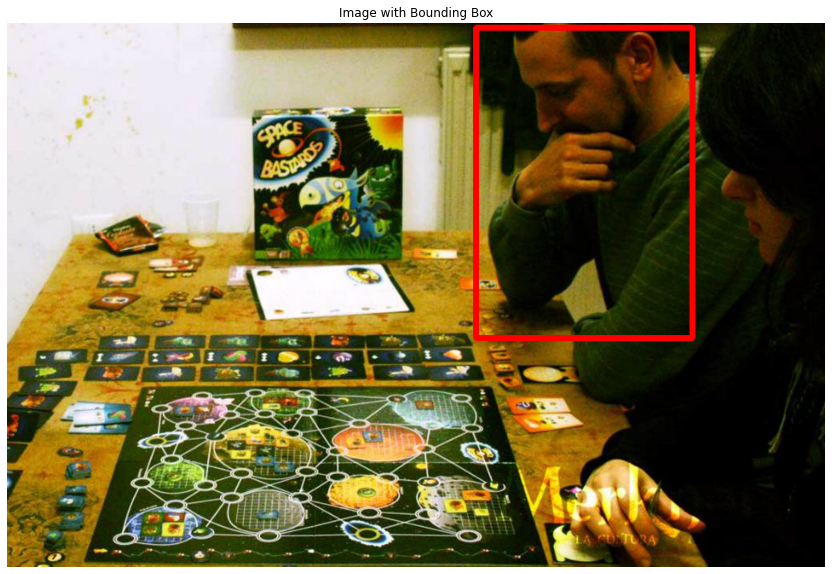

In [ ]:
least_objects_img_ids = annotations_bbox["ImageID"].value_counts().tail(50).index.values
#https://www.geeksforgeeks.org/python-random-sample-function/
#https://www.w3schools.com/python/ref_random_sample.asp
for img_id in random.sample(list(least_objects_img_ids), 1):
  print(img_id)
  plot_bbox(img_id)

In [ ]:
bed_pd = class_descriptions[class_descriptions[1]=='Bed'] 
chair_pd=class_descriptions[class_descriptions[1]=='Chair']
table_pd=class_descriptions[class_descriptions[1]=='Table']
table_pd

,0,1
280,/m/04bcr3,Table


In [ ]:
label_name_bed=bed_pd[0].values[0]
label_name_chair=chair_pd[0].values[0]
label_name_table=table_pd[0].values[0]
label_name_table

'/m/04bcr3'

In [ ]:
bed_bbox=annotations_bbox[annotations_bbox['LabelName']==label_name_bed]
chair_bbox=annotations_bbox[annotations_bbox['LabelName']==label_name_chair]
table_bbox=annotations_bbox[annotations_bbox['LabelName']==label_name_table]

In [ ]:
bed_image_id=bed_bbox['ImageID']
chair_image_id=chair_bbox['ImageID']
table_image_id=table_bbox['ImageID']

In [ ]:
n=100
subbed_image_id=random.sample(list(bed_image_id),n)
subchair_image_id=random.sample(list(chair_image_id),n)
subtable_image_id=random.sample(list(table_image_id),n)

In [ ]:
subbed_pd=images_boxable.loc[images_boxable['ImageID'].isin(subbed_image_id)]
subchair_pd=images_boxable.loc[images_boxable['ImageID'].isin(subbed_image_id)]
subtable_pd=images_boxable.loc[images_boxable['ImageID'].isin(subtable_image_id)]

In [ ]:
subbed_dict=subbed_pd[['ImageID','OriginalURL']].set_index('ImageID')['OriginalURL'].to_dict()
subchair_dict=subchair_pd[['ImageID','OriginalURL']].set_index('ImageID')['OriginalURL'].to_dict()
subtable_dict=subtable_pd[['ImageID','OriginalURL']].set_index('ImageID')['OriginalURL'].to_dict()

In [ ]:
mappings=[subbed_dict,subchair_dict,subtable_dict]

In [ ]:
classes=['Bed','Chair','Table']
classes

['Bed', 'Chair', 'Table']

In [ ]:
for idx,obj_type in enumerate(classes):
  n_issues=0
  #create the directory
  if not os.path.exists(obj_type):
    os.mkdir(obj_type)
  for img_id,url in mappings[idx].items():
    try:
      #print(img_id)
      img=io.imread(url)
      saved_path=os.path.join(obj_type, img_id+".jpg")
      io.imsave(saved_path, img)
    except Exception as e:
      n_issues+=1
      
  print(f"Images Issues : {n_issues}")

Images Issues : 12
Images Issues : 12
Images Issues : 5


In [ ]:
all_imgs=os.listdir(classes[0])
print(all_imgs)
#jodi all_imgs er kno value . dara suru hoi tobe oi . dia suru howa value bad dia baki value store hobe
all_imgs = [f for f in all_imgs if not f.startswith('.')]

['7281920dbcb93de4.jpg', 'a71919f886cbc0f8.jpg', '044b8f6bf440e9d7.jpg', 'e9e17ec87126e016.jpg', '78ae33368240ee99.jpg', '7a8e5e7bb07d1725.jpg', 'a554aadf8856aea9.jpg', '43d6e70fb1a7fc0c.jpg', '644e4059f93530d9.jpg', 'e6750723274ef940.jpg', '01a087f109eb8855.jpg', '30f71c911e98e84a.jpg', '56da39775c9ba896.jpg', 'e393b042e10ff457.jpg', 'dfaf9d1100af1211.jpg', '21e5ffa379eddd38.jpg', '04c2c6a30ea85833.jpg', '033828fe13294a96.jpg', '1fb729406a01992d.jpg', '321e20f6eac51909.jpg', '2eeff1e025853156.jpg', 'a58f283ddb9104eb.jpg', '083799cdea2e4c14.jpg', 'df1925934776a905.jpg', '7042debdad16afae.jpg', '2ba2d722de1de168.jpg', '1629cb51a7a9f866.jpg', '0d272988c4db416b.jpg', '504986ee69c2e408.jpg', '09c96a274fd701f7.jpg', 'bd42b0d9f3aa1467.jpg', '026319ec416e1d12.jpg', 'a4730d76b7b03ad3.jpg', 'bd87b77bd978d069.jpg', '20dfe835d491baa1.jpg', '2197589e635fc6d8.jpg', '09ace300b204561e.jpg', '385bb6e65af7e02e.jpg', 'e268b45ab3419956.jpg', '70ebfdc5a1fa112c.jpg', '97ef47224d381d35.jpg', '80efb29b30cdb6

In [ ]:
train_path='train'
test_path='test' 
if not os.path.exists('train'):
  os.mkdir('train')
if not os.path.exists('test'):
  os.mkdir('test')

In [ ]:
aa=np.arange(0,10)
print('aa : ',aa)
print('aa[:6] : ',aa[:6])
print('aa[6:] : ',aa[6:])

aa :  [0 1 2 3 4 5 6 7 8 9]
aa[:6] :  [0 1 2 3 4 5]
aa[6:] :  [6 7 8 9]


In [ ]:
n=100
for i in range(len(classes)):
  all_imgs=os.listdir(classes[i])
  all_imgs=[f for f in all_imgs if not f.startswith('.')]
  random.shuffle(all_imgs)
  limit=int(n*.6)
  train_imgs=all_imgs[:limit]
  print('train_imgs : ',len(train_imgs))
  test_imgs=all_imgs[limit:]
  print('test_imgs : ',len(test_imgs))
  for j in range(len(train_imgs)):
    original_path=os.path.join(classes[i],train_imgs[j])
    new_path=os.path.join('train',train_imgs[j])
    copyfile(original_path,new_path)

  for j in range(len(test_imgs)):
    original_path=os.path.join(classes[i],test_imgs[j])
    new_path=os.path.join('test',test_imgs[j])
    copyfile(original_path,new_path)



train_imgs :  60
test_imgs :  27
train_imgs :  60
test_imgs :  27
train_imgs :  60
test_imgs :  35


In [ ]:
train_img_count=os.listdir('/content/train')
print('Number of images in train found: ',len(train_img_count))

test_img_count=os.listdir('/content/test')
print('Number of images in test found: ',len(test_img_count))

Number of images in train found:  139
Number of images in test found:  81


In [ ]:
label_names=[label_name_bed,label_name_chair,label_name_table]
train_df=pd.DataFrame(columns=['FileName','XMin','XMax','YMin','YMax','ClassName'])
train_df
train_imgs=os.listdir('/content/train')
train_imgs=[f for f in train_imgs if not f.startswith('.')]

In [ ]:
for i in range(len(train_imgs)):
  img_name=train_imgs[i]
  img_id=img_name[0:16]
  #print(img_name,'     ',img_id)
  tmp_df=annotations_bbox[annotations_bbox['ImageID']==img_id]
  for index,row in tmp_df.iterrows():
    labelName=row['LabelName']
    for j in range(len(label_names)):
      if(labelName==label_names[j]):
       # print(labelName)
        train_df=train_df.append({
            'FileName':img_name,
            'XMin':row['XMin'],
            'XMax':row['XMax'],
            'YMin':row['YMin'],
            'YMax':row['YMax'],
            'ClassName':classes[j]
        },ignore_index=True)

In [ ]:
train_img_ids = train_df["FileName"].head().str.split(".").str[0].unique()

In [ ]:
label_names=[label_name_bed,label_name_chair,label_name_table]
print(label_names[0],'     ',label_name_bed)
test_df=pd.DataFrame(columns=['FileName','XMin','XMax','YMin','YMax','ClassName'])
test_df
test_imgs=os.listdir('/content/test')
test_imgs
test_imgs=[f for f in test_imgs if not f.startswith('.')]

/m/03ssj5       /m/03ssj5


In [ ]:
for i in range(len(test_imgs)):
  img_name=test_imgs[i]
  img_id=img_name[0:16]
  #print(img_name,'    ',img_id)
  tmp_df=annotations_bbox[annotations_bbox['ImageID']==img_id]
  for index,row in tmp_df.iterrows():
    labelName=row['LabelName']
    #print(labelName)
    for j in range(len(label_names)):
      if(label_names[j]==labelName):
        #print(labelName)
        test_df=test_df.append({
            'FileName':img_name,
            'XMin':row['XMin'],
            'XMax':row['XMin'],
            'YMin':row['YMin'],
            'YMax':row['YMax'],
            'ClassName':classes[j]
        },ignore_index=True)



In [ ]:
train_df.to_csv('train_csv',index=False)
test_df.to_csv('test_csv')
train_csv=pd.read_csv('train_csv')
print('train_csv : ',train_csv.shape)
test_csv=pd.read_csv('test_csv')
print('test_csv  : ',test_csv.shape)

train_csv :  (509, 6)
test_csv  :  (291, 7)


In [ ]:
#train_csv

In [ ]:
#train_df
with open('train_annotation.txt','w+') as f:
  for index,row in train_df.iterrows():
    img=cv2.imread('train/'+row['FileName'])
    #print(img)
    height,width=img.shape[:2]
    x1=int(row['XMin']*width)
    x2=int(row['XMax']*width)
    y1=int(row['YMin']*height)
    y2=int(row['YMax']*height)
    train='/content/train'
    fileName=os.path.join(train,row['FileName'])
    className=row['ClassName']
    #print(className)
    f.write(fileName + ',' + str(x1) + ',' + str(x2) + ',' + str(y1) + ',' + str(y2) + ',' + className + '\n')


In [ ]:
with open('test_annotations.txt','w+') as f:
  for index,row in test_df.iterrows():
    img=cv2.imread('test/'+row['FileName'])
    height,width=img.shape[:2]
    height,width=img.shape[:2]
    x1=int(row['XMin']*width)
    x2=int(row['XMax']*width)
    y1=int(row['YMin']*height)
    y2=int(row['YMax']*height)
    test='/content/test'
    fileName=os.path.join(test,row['FileName'])
    className=row['ClassName']
    f.write(fileName+','+str(x1)+','+str(x2)+','+str(y1)+','+str(y2)+','+className+'\n')

In [ ]:
#https://github.com/RockyXu66/Faster_RCNN_for_Open_Images_Dataset_Keras/blob/master/frcnn_train_vgg.ipynb
#https://www.programmersought.com/article/20562749280/
from __future__ import division
from __future__ import print_function
from __future__ import absolute_import
import random
import pprint
import sys
import time
import numpy as np
from optparse import OptionParser
import pickle
import math
import cv2
import copy
from matplotlib import pyplot as plt
import tensorflow as tf
import pandas as pd
import os

from sklearn.metrics import average_precision_score

from keras import backend as K
from keras.optimizers import Adam, SGD, RMSprop
from keras.layers import Flatten, Dense, Input, Conv2D, MaxPooling2D, Dropout
from keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D, TimeDistributed
from keras.engine.topology import get_source_inputs
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.objectives import categorical_crossentropy

from keras.models import Model
from keras.utils import generic_utils
# If any problem with ########### importing Layer
#https://stackoverflow.com/questions/51337558/how-to-import-keras-engine-topology-in-tensorflow/51337967
from keras.engine.topology import Layer,InputSpec
from keras import initializers, regularizers

In [ ]:
class Config:

	def __init__(self):

    #https://ask.openstack.org/en/question/79373/what-does-it-mean-verbosetrue/
		# Print the process or not
    #Setting verbose to True in the configuration will result in the service generating more 
    #output (will show you both WARNING and INFO log levels)
		self.verbose = True      ######## For more informations about Errors

		# Name of base network
		self.network = 'vgg'

		# Setting for data augmentation
		self.use_horizontal_flips = False
		self.use_vertical_flips = False
		self.rot_90 = False

		# Anchor box scales
    # Note that if im_size is smaller, anchor_box_scales should be scaled
    # Original anchor_box_scales in the paper is [128, 256, 512]
		self.anchor_box_scales = [64, 128, 256] 

		# Anchor box ratios
    #An aspect ratio is the ratio between the width and heigh
		self.anchor_box_ratios = [[1, 1], [1./math.sqrt(2), 2./math.sqrt(2)], [2./math.sqrt(2), 1./math.sqrt(2)]]

		# Size to resize the smallest side of the image
		# Original setting in paper is 600. Set to 300 in here to save training time
		self.im_size = 300

		# image channel-wise mean to subtract
		self.img_channel_mean = [103.939, 116.779, 123.68]
		self.img_scaling_factor = 1.0

		# number of ROIs at once
		self.num_rois = 4

		# stride at the RPN (this depends on the network configuration)
		self.rpn_stride = 16

		self.balanced_classes = False

		# scaling the stdev
		self.std_scaling = 4.0
		self.classifier_regr_std = [8.0, 8.0, 4.0, 4.0]

		# overlaps for RPN
		self.rpn_min_overlap = 0.3
		self.rpn_max_overlap = 0.7

		# overlaps for classifier ROIs
		self.classifier_min_overlap = 0.1
		self.classifier_max_overlap = 0.5

		# placeholder for the class mapping, automatically generated by the parser
		self.class_mapping = None

		self.model_path = None

In [ ]:
import math
#Two dimensional array is an array within an array. It is an array of arrays.
anchor_box_ratios = [[1, 1], [1./math.sqrt(2), 2./math.sqrt(2)], [2./math.sqrt(2), 1./math.sqrt(2)]]
anchor_box_ratios

[[1, 1],
 [0.7071067811865475, 1.414213562373095],
 [1.414213562373095, 0.7071067811865475]]

In [ ]:
anchor_box_ratios[2][1]

0.7071067811865475

In [ ]:
#https://www.tutorialspoint.com/python/python_files_io.htm
#https://www.guru99.com/reading-and-writing-files-in-python.html
#https://www.w3schools.com/python/python_file_open.asp
# Open a file
fo = open("python_file_handling.txt", "wb")
print("Name of the file: ", fo.name)
print("Closed or not : ", fo.closed)
print("Opening mode : ", fo.mode)

print('#########################################')

# Open a file
with open("python_file_handling.txt", "w+") as f:
  print("Name of the file: ", f.name)
  f.write('this is python file handling')
# Close opend file
fo.close()

Name of the file:  python_file_handling.txt
Closed or not :  False
Opening mode :  wb
#########################################
Name of the file:  python_file_handling.txt


In [ ]:
for i in range(5):
  print('This is line %d\r\n'%i)

This is line 0

This is line 1

This is line 2

This is line 3

This is line 4



In [ ]:
#https://www.geeksforgeeks.org/sys-stdout-write-in-python/
# stdout assigned to a variable 
arr = ['geeks', 'for', 'geeks'] 
# printing everything in the same line 
for i in arr: 
  sys.stdout.write(i) 
print('\n#############################')
# printing everything in a new line 
for j in arr: 
  sys.stdout.write(j+'\n') 

geeksforgeeks
#############################
geeks
for
geeks


In [ ]:
#https://www.w3schools.com/python/ref_string_strip.asp

#Remove spaces at the beginning and at the end of the string:
txt ="      ,,,,,rrttgg.....bangana.  ...rrr            ab   ."
x = txt.strip()
print(x)
#Remove the leading and trailing characters (suru & ses theke j porjonto ai(,.grt) pabo delete korbo)
txt = ",,,,,rrttgg.....bangana.  ...rrr            ab   ct."
x = txt.strip(",.grt")
print(x)
#Remove the leading and trailing characters (suru & ses theke j porjonto ai(,.grt) pabo delete korbo)
txt = "      ,,,,,rrttgg.....bangana.  ...rrr            ab   ct."
x = txt.strip(",.grt")
print(x)

,,,,,rrttgg.....bangana.  ...rrr            ab   .
bangana.  ...rrr            ab   c
      ,,,,,rrttgg.....bangana.  ...rrr            ab   c


In [ ]:
txt = "       ,,,,,rrt,,sd,,tgg.....,bangana,.  ...rr,,,r     ,ab,   ct.   "
x=txt.strip()
print(x)
#,, er vitorer part gulo k separate korbe
x = txt.strip().split(",")
print(x)

,,,,,rrt,,sd,,tgg.....,bangana,.  ...rr,,,r     ,ab,   ct.
['', '', '', '', '', 'rrt', '', 'sd', '', 'tgg.....', 'bangana', '.  ...rr', '', '', 'r     ', 'ab', '   ct.']


**Parser the data from annotation file**

In [ ]:
def get_data(input_path):
# Parse the data from annotation file
# 	Args:
# 		input_path: annotation file path
# 	Returns:
# 		all_data: list(filepath, width, height, list(bboxes))
# 		classes_count: dict{key:class_name, value:count_num} 
# 			e.g. {'Car': 2383, 'Mobile phone': 1108, 'Person': 3745}
# 		class_mapping: dict{key:class_name, value: idx}
# 			e.g. {'Car': 0, 'Mobile phone': 1, 'Person': 2}
  found_bg = False
  all_imgs = {}
  classes_count = {}
  class_mapping = {}
  visualise = True
  i = 1
  with open(input_path,'r') as f:
    #https://www.w3schools.com/python/python_file_open.asp
    #print(f.read())    ###############################
    ########### read just one line ###############
    #print(f.readline())
    ##print('Parsing annotation files')
    cc=0
    for line in f:
      # if(cc>7):
      #   break
      # cc+=1
      #https://www.geeksforgeeks.org/sys-stdout-write-in-python/
      # stdout is used to display output directly to the screen console
      #akhane str(i) na dia sudu i dilee error dekhabe
  ####### baki sob as usual colbe but'\r' dewar fole loop er vitore thaka sotteo sudu 1 bar loop ses a print korbe #######
      sys.stdout.write('\r'+'idx = '+str(i))
      i += 1
      line_split = line.strip().split(',')
      # Make sure the info saved in annotation file matching the format (path_filename, x1, y1, x2, y2, class_name)
			# Note:
			#	One path_filename might has several classes (class_name)
			#	x1, y1, x2, y2 are the pixel value of the origial image, not the ratio value
			#	(x1, y1) top left coordinates; (x2, y2) bottom right coordinates
			#   x1,y1-------------------
			#	|						|
			#	|						|
			#	|						|
			#	|						|
			#	---------------------x2,y2
      (filename,x1,y1,x2,y2,class_name) = line_split
      #Calculate how many Bed,Chair,Table in the dataset&&&&& here output : {'Bed': 11, 'Chair': 7, 'Table': 19}
      if class_name not in classes_count:
        classes_count[class_name]=1
      else:
        classes_count[class_name]+=1

        if class_name not in class_mapping:
          if class_name=='bg' and found_bg==False:
            ##print('Found class name with special name bg. Will be treated as a background region (this is usually \
            ##for hard negative mining).')
            found_bg=True
          class_mapping[class_name]=len(class_mapping)
          #print(class_mapping[class_name],'   ',class_name,'  ',class_mapping)
      #### ekti pic a tahka chair,table,pen,light ekti matro filename er under a thakbe 
      if filename not in all_imgs:
        all_imgs[filename]={}
        img=cv2.imread(filename)
        (rows,cols) = img.shape[:2]
        #print(img,'    ',filename)
        all_imgs[filename]['filepath']=filename
        all_imgs[filename]['width']=cols
        all_imgs[filename]['height']=rows
        all_imgs[filename]['bboxes']=[]
      all_imgs[filename]['bboxes'].append({'class':class_name,'x1':int(x1),'x2':int(x2),'y1':int(y1),'y2':int(y2)})
      #print('\n',all_imgs)
      # print(all_imgs[filename])

      all_data=[]
      for key in all_imgs:
        all_data.append(all_imgs[key])##### or all_data.append(all_imgs)
      #print(all_data)
      #print(line_split)

      # make sure the bg class is last in the list
      if found_bg:
        if class_mapping['bg'] != len(class_mapping) - 1:
          ##print('get error ######: ',len(class_mapping))
          key_to_switch = [key for key in class_mapping.keys() if class_mapping[key] == len(class_mapping)-1][0]
          val_to_switch = class_mapping['bg']
          class_mapping['bg'] = len(class_mapping) - 1
          class_mapping[key_to_switch] = val_to_switch
  return all_data,classes_count,class_mapping

  #print('\n',filename,x1,y1,x2,y2,class_name)


**Define ROI Pooling Convolutional Layer**

In [ ]:
#https://www.programmersought.com/article/10503977881/
#https://www.programmersought.com/article/80222685327/
#https://www.programmersought.com/article/59652685332/
#https://www.programmersought.com/article/77632685359/
#https://www.programmersought.com/article/63604107382/
#https://www.programmersought.com/article/63336885353/
#https://www.youtube.com/watch?v=5dZ_lvDgevk&ab_channel=FRONTLINEPBS%7COfficial

In [ ]:
def fun(*args,**kwargs):
  print('args : ',args)
  print('kwargs : ',kwargs)
  for key,value in kwargs.items():
    print('%s == %s' %(key,value))

fun('hi',1,'sohag',first='Md.',mid='sohag',last='hossain')

args :  ('hi', 1, 'sohag')
kwargs :  {'first': 'Md.', 'mid': 'sohag', 'last': 'hossain'}
first == Md.
mid == sohag
last == hossain


In [ ]:
class square():
  def __init__(self,a):
      self.a=a
  def area(self):
    return self.a*self.a

In [ ]:
############################## OVERWRRIDING ##############################
class parent1():
  def __init__(self):#############instructor dile surely object instantiate korar time a kisu pass korte hobe
    self.a="inside parent1"
  def show(self):
    print(self.a)

class parent2():
  def display_(self):
    print("inside parent2")

class child(parent1,parent2):
  def __init__(self):
    self.c="inside child"
  def show(self):
    print(self.c)

In [ ]:
obj=child()
obj.show()
obj.display_()

inside child
inside parent2


In [ ]:
#Using Super(): Python super() function provides us the facility to refer to the parent class explicitly. 
#It is basically useful where we have to call superclass functions. It returns the proxy object that 
#allows us to refer parent class by ‘super’.

In [ ]:
############################## OVERWRRIDING using super() ##############################
class parent1():
  #def __init__(self):#############instructor dile surely object instantiate orar time a kisu pass korte hobe
    #self.a="inside parent1"
  def show(self):
    print("inside parent1")

class parent2():
  def display_(self):
    print("inside parent2")

class child(parent1,parent2):
  def __init__(self):
    self.c="inside child"
  def show(self):
    super().show()############ parent class er show() method k call korbe
    print(self.c)

In [ ]:
obj=child()
obj.show()
obj.display_()

inside parent1
inside child
inside parent2


In [ ]:
class square():
  def __init__(self,a):
    self.a=a
  def area(self):
    return self.a*self.a*10  #akhane a er value ta squareprism class er j value thik oi taiiiii

class squareprism(square):
  def __init__(self,a,b):
    self.a=a
    self.b=b
  def area(self):
    return self.a*self.b
  def face_area(self):
    sq_area=self.a*self.b
    sq_area_p=super().area()
    return sq_area,sq_area_p

class cube(squareprism):
  def __init__(self,a1):
    super().__init__(a=a1,b=a1)#cause squareprism parameter name a and b ase

  #Here we use super(SquarePrism, self).face_area() to call the area() method of the class Square. 
  #In the first argument, SquarePrism signifies that super() searches for the area() method in the 
  #immediate parent of the class SquarePrism, that is in the class Square. The use of self as the 
  #second parameter provides the context of the current Cube object to super() for the requested 
  #area() method to act upon.

  def face_area(self):
    return super(squareprism,self).area()
  def area(self):
    return super().area()
  


In [ ]:
obj=square(5)
obj_prism=squareprism(7,6)
print(obj.area())
print(obj_prism.area())########### squareprism(7,6) er 1st parameter square() class nisee
obj_prism.face_area()

250
42


(42, 490)

In [ ]:
obj_cube=cube(12)
print(obj_cube.area())
print(obj_cube.face_area())

144
1440


In [ ]:
x='hello'
#if condition returns true, then nothing happens
assert(x=='hello')
#if condition returns False, then AssertionError is raised
#assert(x=='helo')

In [ ]:
# class Layer:
#   def __init__(self, **kwargs):
#     # self.a=kwargs
#     # print('inside : ',kwargs,a)
#     pass

In [ ]:
class RoiPoolingConv1(Layer):
    def __init__(self, pool_size, num_rois, **kwargs):
      #jokhon list [...] theke value jete thakbe tokhon super(RoiPoolingConv, self).__init__(**kwargs) call hobe
      #and parent class Layer na thakai list er value gulo **kwargs er maddome apna-apni print hobe 
      super(RoiPoolingConv1, self).__init__(**kwargs)
      #self.dim_ordering = K.image_dim_ordering()
      #print(pool_size,'   ',num_rois,'     ',kwargs)

out_roi_pool = RoiPoolingConv1(2, 3)([11, 222,'dsf','sd','sd',42])
out_roi_pool

[<tf.Tensor: shape=(), dtype=int32, numpy=11>,
 <tf.Tensor: shape=(), dtype=int32, numpy=222>,
 'dsf',
 'sd',
 'sd',
 <tf.Tensor: shape=(), dtype=int32, numpy=42>]

In [ ]:
#https://www.tensorflow.org/api_docs/python/tf/keras/layers/Layer#:~:text=A%20layer%20is%20a%20callable,in%20the%20build()%20method.

#A layer is a callable object that takes as input one or more tensors and that outputs one or more tensors. 
#It involves computation, defined in the call() method, and a state (weight variables), defined either 
#in the constructor __init__() or in the build() method.

#from keras.engine import Layer
class RoiPoolingConv1(Layer):
    def __init__(self, pool_size, num_rois, **kwargs):
      #jokhon list [...] theke value jete thakbe tokhon super(RoiPoolingConv, self).__init__(**kwargs) call hobe
      #and parent class Layer import kotrsi bolee list er value gulo **kwargs er maddome apna-apni print hobe 

      #super(RoiPoolingConv1, self).__init__(**kwargs) er jonno call function call hobe and [11, 222,'dsf','sd','sd',42]
      #print korbel,,,,,,,,but (def call) function likle ta x er moddhe jabe nicce bistarito ase
      super(RoiPoolingConv1, self).__init__(**kwargs)
      print(pool_size,'   ',num_rois,'     ',kwargs)

out_roi_pool = RoiPoolingConv1(2, 3)([11, 222,'dsf','sd','sd',42])
out_roi_pool

2     3       {}


[<tf.Tensor: shape=(), dtype=int32, numpy=11>,
 <tf.Tensor: shape=(), dtype=int32, numpy=222>,
 'dsf',
 'sd',
 'sd',
 <tf.Tensor: shape=(), dtype=int32, numpy=42>]

In [ ]:
#https://faroit.com/keras-docs/1.2.2/backend/
#Sets the value of the image dimension ordering convention ('th' or 'tf').
from keras import backend as K
#K.image_dim_ordering() XXXXXXXXXXX  now  k.image_data_format() 
a=K.image_data_format() 
a

'channels_last'

In [ ]:
#https://www.tensorflow.org/api_docs/python/tf/Tensor
#A tensor is a multidimensional array of elements represented by a
t = tf.constant([1,2,3,4,5])
print(t)
c=tf.constant([[1,2],[4,5]])
d=tf.constant([[2,4],[1,3]])
e=tf.matmul(c,d)
print(e)
print(tf.constant(5))

tf.Tensor([1 2 3 4 5], shape=(5,), dtype=int32)
tf.Tensor(
[[ 4 10]
 [13 31]], shape=(2, 2), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)


In [ ]:
#https://numpy.org/doc/stable/reference/arrays.indexing.html
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(x[2:9:1])
print(x[-3:10])
print(x[-3:3:-1])
print(x[-3:13])
print(x[-3:])

[2 3 4 5 6 7 8]
[7 8 9]
[7 6 5 4]
[7 8 9]
[7 8 9]


In [ ]:
#https://numpy.org/doc/stable/reference/arrays.indexing.html
x = np.array([[[1],[2],[3]], [[4],[5],[6]]])
print('x.shape : ',x.shape)
print('x : ',x)
print('x[0:2] : ',x[0:2])
#Ellipsis expands to the number of : objects needed for the selection tuple to index all dimensions. 
#In most cases, this means that length of the expanded selection tuple is x.ndim. There may 
#only be a single ellipsis present.
print('x[...,0] : ',x[...,0])

x.shape :  (2, 3, 1)
x :  [[[1]
  [2]
  [3]]

 [[4]
  [5]
  [6]]]
x[0:2] :  [[[1]
  [2]
  [3]]

 [[4]
  [5]
  [6]]]
x[...,0] :  [[1 2 3]
 [4 5 6]]


In [ ]:
class RoiPoolingConv1(Layer):
    def __init__(self, pool_size, num_rois, **kwargs):
      #jokhon list [...] theke value jete thakbe tokhon super(RoiPoolingConv, self).__init__(**kwargs) call hobe
      #and parent class Layer import kotrsi bolee list er value gulo **kwargs er maddome apna-apni print hobe 
      print(pool_size,'   ',num_rois,'     ',kwargs)
      self.dim_ordering = K.image_data_format() 
      self.pool_size = pool_size
      self.num_rois = num_rois
      #super(RoiPoolingConv, self).__init__(**kwargs) er jonno call function call hobe and [(1,28,28,512),(2,2,5,5)]
      #print korbel,,,,,,,,but (def call) function likle ta x er moddhe jabe nicce bistarito ase
      super(RoiPoolingConv1, self).__init__(**kwargs)

    def build(self, input_shape):
      #its only for self.nb_channels not self.a=input_shape[0][3]
      self.nb_channels = input_shape[0][3]  
      self.a=input_shape[0][3]
      #print('input shape [0][0] : ' ,a)
      print('input shape [0][0] : ' ,input_shape[0][1])
    def compute_output_shape(self,input_shape):
      return None,self.num_rois,self.pool_size,pool_size,self.nb_channels  

    def call(self, x, mask=None):
      print(x)
      assert(len(x) == 2)

      # x[0] is image with shape (rows, cols, channels) here it is :(1,28,28,512)
      img = x[0]
      print('img  : ',img)
      # x[1] is roi with shape (num_rois,4) with ordering (x,y,w,h) here it is :(2,2,5,5)
      rois = x[1]
      print('rois : ',rois)
      input_shape = K.shape(img)
      outputs = []
      for roi_idx in range(self.num_rois):
        x = roi_idx
        print('insise loop x : ',x)   
      print(rois[0])   
      #x = rois[0, roi_idx, 0]

#rs = tf.image.resize_images(img[:, y:y+h, x:x+w, :], (self.pool_size, self.pool_size))
x=1
y=2
w=4
h=5
# a=img[:, :, :, :]
# print(a)
out_roi_pool = RoiPoolingConv1(7, 4)([(1,28,28,512),(2,2,5,5)])
print(out_roi_pool)

    

7     4       {}
input shape [0][0] :  ()
[(<tf.Tensor: shape=(), dtype=int32, numpy=1>, <tf.Tensor: shape=(), dtype=int32, numpy=28>, <tf.Tensor: shape=(), dtype=int32, numpy=28>, <tf.Tensor: shape=(), dtype=int32, numpy=512>), (<tf.Tensor: shape=(), dtype=int32, numpy=2>, <tf.Tensor: shape=(), dtype=int32, numpy=2>, <tf.Tensor: shape=(), dtype=int32, numpy=5>, <tf.Tensor: shape=(), dtype=int32, numpy=5>)]
img  :  (<tf.Tensor: shape=(), dtype=int32, numpy=1>, <tf.Tensor: shape=(), dtype=int32, numpy=28>, <tf.Tensor: shape=(), dtype=int32, numpy=28>, <tf.Tensor: shape=(), dtype=int32, numpy=512>)
rois :  (<tf.Tensor: shape=(), dtype=int32, numpy=2>, <tf.Tensor: shape=(), dtype=int32, numpy=2>, <tf.Tensor: shape=(), dtype=int32, numpy=5>, <tf.Tensor: shape=(), dtype=int32, numpy=5>)
insise loop x :  0
insise loop x :  1
insise loop x :  2
insise loop x :  3
tf.Tensor(2, shape=(), dtype=int32)
None


In [ ]:
class RoiPoolingConv(Layer):
    '''ROI pooling layer for 2D inputs.
    See Spatial Pyramid Pooling in Deep Convolutional Networks for Visual Recognition,
    K. He, X. Zhang, S. Ren, J. Sun
    # Arguments
        pool_size: int
            Size of pooling region to use. pool_size = 7 will result in a 7x7 region.
        num_rois: number of regions of interest to be used
    # Input shape
        list of two 4D tensors [X_img,X_roi] with shape:
        X_img:
        `(1, rows, cols, channels)`
        X_roi:
        `(1,num_rois,4)` list of rois, with ordering (x,y,w,h)
    # Output shape
        3D tensor with shape:
        `(1, num_rois, channels, pool_size, pool_size)`
    '''
    def __init__(self, pool_size, num_rois, **kwargs):

        self.dim_ordering = K.image_data_format()
        self.pool_size = pool_size
        self.num_rois = num_rois

        super(RoiPoolingConv, self).__init__(**kwargs)

    def build(self, input_shape):
        self.nb_channels = input_shape[0][3]   

    def compute_output_shape(self, input_shape):
        return None, self.num_rois, self.pool_size, self.pool_size, self.nb_channels

    def call(self, x, mask=None):

        assert(len(x) == 2)

        # x[0] is image with shape (rows, cols, channels)
        img = x[0]

        # x[1] is roi with shape (num_rois,4) with ordering (x,y,w,h)
        rois = x[1]

        input_shape = K.shape(img)

        outputs = []
        cc=0
        for roi_idx in range(self.num_rois):

            x = rois[0, roi_idx, 0]
            y = rois[0, roi_idx, 1]
            w = rois[0, roi_idx, 2]
            h = rois[0, roi_idx, 3]
            # if(cc<=5):
            #   #print('x:',x,' y:',y,' w:',w,' h:',h)
            cc=cc+1

            x = K.cast(x, 'int32')
            y = K.cast(y, 'int32')
            w = K.cast(w, 'int32')
            h = K.cast(h, 'int32')
            # if(cc<10):
            #   #print('x:',x,' y:',y,' w:',w,' h:',h)

            # Resized roi of the image to pooling size (7x7)
            rs = tf.image.resize(img[:, y:y+h, x:x+w, :], (self.pool_size, self.pool_size))
            outputs.append(rs)
                
        ##print('rs : ',rs)
        final_output = K.concatenate(outputs, axis=0)

        # Reshape to (1, num_rois, pool_size, pool_size, nb_channels)
        # Might be (1, 4, 7, 7, 3)
        final_output = K.reshape(final_output, (1, self.num_rois, self.pool_size, self.pool_size, self.nb_channels))

        # permute_dimensions is similar to transpose
        final_output = K.permute_dimensions(final_output, (0, 1, 2, 3, 4))

        return final_output
    
    
    def get_config(self):
        config = {'pool_size': self.pool_size,
                  'num_rois': self.num_rois}
        base_config = super(RoiPoolingConv, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

In [ ]:
#https://keras.io/api/utils/backend_utils/
np_var = np.array([1, 2])
print('np_var : ',np_var)
#######  tf.keras.backend.is_keras_tensor(np_var)
################     then show error      #####################
# Traceback (most recent call last):
# ...
# ValueError: Unexpectedly found an instance of type `<class 'numpy.ndarray'>`.
# Expected a symbolic tensor instance.
keras_var = tf.keras.backend.variable(np_var)
# A variable created with the keras backend is not a Keras tensor. 
print('keras_var : ',keras_var)
print('tf.keras.backend.is_keras_tensor(keras_var) : ', tf.keras.backend.is_keras_tensor(keras_var))
# A placeholder is a Keras tensor.
keras_placeholder = tf.keras.backend.placeholder(shape=(2, 4, 5))
print('tf.keras.backend.is_keras_tensor(keras_placeholder) :',tf.keras.backend.is_keras_tensor(keras_placeholder))
# An Input is a Keras tensor. 
keras_input = tf.keras.layers.Input([10])
print('tf.keras.layers.Input([10]) : ',keras_input)
print('tf.keras.backend.is_keras_tensor(keras_input) : ',tf.keras.backend.is_keras_tensor(keras_input))
keras_layer_output = tf.keras.layers.Dense(10)(keras_input)
print('tf.keras.layers.Dense(10)(keras_input) : ',keras_layer_output)
# Any Keras layer output is a Keras tensor.
print('tf.keras.backend.is_keras_tensor(keras_layer_output) : ',tf.keras.backend.is_keras_tensor(keras_layer_output))

np_var :  [1 2]
keras_var :  <tf.Variable 'Variable:0' shape=(2,) dtype=float32, numpy=array([1., 2.], dtype=float32)>
tf.keras.backend.is_keras_tensor(keras_var) :  False
tf.keras.backend.is_keras_tensor(keras_placeholder) : True
tf.keras.layers.Input([10]) :  KerasTensor(type_spec=TensorSpec(shape=(None, 10), dtype=tf.float32, name='input_2'), name='input_2', description="created by layer 'input_2'")
tf.keras.backend.is_keras_tensor(keras_input) :  True
tf.keras.layers.Dense(10)(keras_input) :  KerasTensor(type_spec=TensorSpec(shape=(None, 10), dtype=tf.float32, name=None), name='dense/BiasAdd:0', description="created by layer 'dense'")
tf.keras.backend.is_keras_tensor(keras_layer_output) :  True


In [ ]:
def get_img_output_length(width, height):
    ##print('inside get_img_output_length ',width,'  ',height,'    #$##$#$  ')
    def get_output_length(input_length):
        return input_length//16

    return get_output_length(width), get_output_length(height)    

def nn_base(input_tensor=None, trainable=False):


    input_shape = (None, None, 3)

    if input_tensor is None:
        img_input = Input(shape=input_shape)
    else:
        if not K.is_keras_tensor(input_tensor):
            img_input = Input(tensor=input_tensor, shape=input_shape)
        else:
            img_input = input_tensor

    bn_axis = 3

    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
    # x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

    return x

The goal of the RPN network is to learn to identify which boxes are good boxes, may contain foreground objects and produce target regression coefficients, when applied to the anchor box, the anchor box is converted into a better bounding box closer to the closed Foreground object.

In [ ]:
#https://medium.com/@nabil.madali/demystifying-region-proposal-network-rpn-faa5a8fb8fce
def rpn_layer(base_layers, num_anchors):
    """Create a rpn layer
        Step1: Pass through the feature map from base layer to a 3x3 512 channels convolutional layer
                Keep the padding 'same' to preserve the feature map's size
        Step2: Pass the step1 to two (1,1) convolutional layer to replace the fully connected layer
                classification layer: num_anchors (9 in here) channels for 0, 1 sigmoid activation output
                regression layer: num_anchors*4 (36 in here) channels for computing the regression of bboxes with linear activation
    Args:
        base_layers: vgg in here
        num_anchors: 9 in here

    Returns:
        [x_class, x_regr, base_layers]
        x_class: classification for whether it's an object
        x_regr: bboxes regression
        base_layers: vgg in here
    """
    x = Conv2D(512, (3, 3), padding='same', activation='relu', kernel_initializer='normal', name='rpn_conv1')(base_layers)

    x_class = Conv2D(num_anchors, (1, 1), activation='sigmoid', kernel_initializer='uniform', name='rpn_out_class')(x)
    x_regr = Conv2D(num_anchors * 4, (1, 1), activation='linear', kernel_initializer='zero', name='rpn_out_regress')(x)

    return [x_class, x_regr, base_layers]

In [ ]:
def classifier_layer(base_layers, input_rois, num_rois, nb_classes = 4):
    """Create a classifier layer
    
    Args:
        base_layers: vgg
        input_rois: `(1,num_rois,4)` list of rois, with ordering (x,y,w,h)
        num_rois: number of rois to be processed in one time (4 in here)

    Returns:
        list(out_class, out_regr)
        out_class: classifier layer output
        out_regr: regression layer output
    """

    input_shape = (num_rois,7,7,512)

    pooling_regions = 7

    # out_roi_pool.shape = (1, num_rois, channels, pool_size, pool_size)
    # num_rois (4) 7x7 roi pooling
    out_roi_pool = RoiPoolingConv(pooling_regions, num_rois)([base_layers, input_rois])

    # Flatten the convlutional layer and connected to 2 FC and 2 dropout
    out = TimeDistributed(Flatten(name='flatten'))(out_roi_pool)
    out = TimeDistributed(Dense(4096, activation='relu', name='fc1'))(out)
    out = TimeDistributed(Dropout(0.5))(out)
    out = TimeDistributed(Dense(4096, activation='relu', name='fc2'))(out)
    out = TimeDistributed(Dropout(0.5))(out)

    # There are two output layer
    # out_class: softmax acivation function for classify the class name of the object
    # out_regr: linear activation function for bboxes coordinates regression
    out_class = TimeDistributed(Dense(nb_classes, activation='softmax', kernel_initializer='zero'), name='dense_class_{}'.format(nb_classes))(out)
    # note: no regression target for bg class
    out_regr = TimeDistributed(Dense(4 * (nb_classes-1), activation='linear', kernel_initializer='zero'), name='dense_regress_{}'.format(nb_classes))(out)

    return [out_class, out_regr]

In [ ]:
def union(au, bu, area_intersection):
	area_a = (au[2] - au[0]) * (au[3] - au[1])
	area_b = (bu[2] - bu[0]) * (bu[3] - bu[1])
	area_union = area_a + area_b - area_intersection
	return area_union


def intersection(ai, bi):
	x = max(ai[0], bi[0])
	y = max(ai[1], bi[1])
	w = min(ai[2], bi[2]) - x
	h = min(ai[3], bi[3]) - y
	if w < 0 or h < 0:
		return 0
	return w*h


def iou(a, b):
	# a and b should be (x1,y1,x2,y2)

	if a[0] >= a[2] or a[1] >= a[3] or b[0] >= b[2] or b[1] >= b[3]:
		return 0.0

	area_i = intersection(a, b)
	area_u = union(a, b, area_i)

	return float(area_i) / float(area_u + 1e-6)

In [ ]:
output_height=29
output_width=18
num_anchors=9
num_bboxes=2
print(np.zeros((4,5)).astype(np.float32))
best_anchor_for_bbox=-1*np.ones((num_bboxes,4)).astype(int)
print('best_anchor_for_bbox ################################### \n',best_anchor_for_bbox)
#output_height row & output_width column bisisto onsho,, num_bboxes sonkhok bar a ta array te thakbe
#outermost dimension will have output_height arrays that contains output_width arrays,each with num_bboxes elements
y_rpn_overlap=np.zeros((output_height,output_width,num_bboxes))
#print('y_rpn_overlap : ############################################# \n',y_rpn_overlap)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
best_anchor_for_bbox ################################### 
 [[-1 -1 -1 -1]
 [-1 -1 -1 -1]]


In [ ]:
# #https://www.quora.com/How-does-the-region-proposal-network-RPN-in-Faster-R-CNN-work?share=1
# #https://www.pyimagesearch.com/2016/11/07/intersection-over-union-iou-for-object-detection/#:~:text=The%20ground-truth%20bounding%20boxes%20%28i.e.%2C%20the%20hand%20labeled,bounding%20boxes%20we%20can%20apply%20Intersection%20over%20Union.
# #https://machinethink.net/blog/object-detection/#:~:text=If%20your%20dataset%20comes%20with%20bounding%20box%20annotations,usual%20probability%20distribution%20for%20the%20classification%20result%2C%20and

# def calc_rpn1(c, img_data, width, height, resized_width, resized_height, img_length_calc_function):
#   # """(Important part!) Calculate the rpn for all anchors 
# 	# 	If feature map has shape 38x50=1900, there are 1900x9=17100 potential anchors

# 	# Args:
# 	# 	C: config
# 	# 	img_data: augmented image data
# 	# 	width: original image width (e.g. 600)
# 	# 	height: original image height (e.g. 800)
# 	# 	resized_width: resized image width according to c.im_size (e.g. 300)
# 	# 	resized_height: resized image height according to c.im_size (e.g. 400)
# 	# 	img_length_calc_function: function to calculate final layer's feature map (of base model) size according to input image size

# 	# Returns:
# 	# 	y_rpn_cls: list(num_bboxes, y_is_box_valid + y_rpn_overlap)
# 	# 		y_is_box_valid: 0 or 1 (0 means the box is invalid, 1 means the box is valid)
# 	# 		y_rpn_overlap: 0 or 1 (0 means the box is not an object, 1 means the box is an object)
# 	# 	y_rpn_regr: list(num_bboxes, 4*y_rpn_overlap + y_rpn_regr)
# 	# 		y_rpn_regr: x1,y1,x2,y2 bunding boxes coordinates

#   downscale=float(c.rpn_stride)
#   anchor_sizes=c.anchor_box_scales    # 128, 256, 512
#   anchor_ratios=c.anchor_box_ratios   # 1:1, 1:2*sqrt(2), 2*sqrt(2):1
#   num_anchors=len(anchor_sizes)*len(anchor_ratios)         # 3*3=9

#   #calculate the output map size based on the network architecture
#   output_width,output_height=img_length_calc_function(resized_width,resized_height)
#   n_anchratios=len(anchor_ratios)    #3
#   #initialize empty output objective

#   y_rpn_overlap=np.zeros((output_height,output_width,num_anchors))
#   y_is_box_valid=np.zeros((output_height,output_width,num_anchors))
#   y_rpn_regr=np.zeros((output_height,output_width,num_anchors*4))
#   num_bboxes=len(image_data['bboxes'])
#   num_anchors_for_bbox=np.zeros(num_bboxes).astype(int)
#   best_anchor_for_bbox=-1*np.ones((num_bboxes,4)).astype(int)
#   best_iou_for_bbox=np.zeros(num_bboxes).astype(np.float32)
#   best_x_for_bbox=np.zeros((num_bboxes,4)).astype(int)
#   best_dx_for_bbox=np.zeros((num_bboxes,4)).astype(np.float32)

#   #Get the GT box coordinates, and resize to account for image resizing 
#   gta=np.zeros((num_bboxes,4))
#   for bbox_num,bbox in enumerate(img_data['bboxes']):
#     #get the GT box coordinates and resize to account for image resizing
#     gta[bbox_num,0]=bbox['x1']*(resized_width/float(width))
    



In [ ]:
aa=np.linspace(1,16,16)
aa=aa.reshape(4,4)
aa=np.expand_dims(aa,axis=0)
print('aa : \n',aa)
s=1
aa[0,0,s:s+2]=aa[0,0,s:s+2]+1
print('aa[0,0,s:s+2] : ',aa[0,0,s:s+2])
#b=np.transpose(aa,(2,0,1))

aa : 
 [[[ 1.  2.  3.  4.]
  [ 5.  6.  7.  8.]
  [ 9. 10. 11. 12.]
  [13. 14. 15. 16.]]]
aa[0,0,s:s+2] :  [3. 4.]


In [ ]:
#https://www.javatpoint.com/numpy-transpose   
a = np.linspace(1,24,24).reshape(2,3,4)
print('shape of a : ',a.shape,' \n np.linspace(1,24,24).reshape(2,3,4)\n',a)
a1=np.transpose(a,(1,0,2)).shape
a2=np.transpose(a,(2,1,0)).shape
a11=np.transpose(a,(1,0,2))
a22=np.transpose(a,(2,1,0))
print('shape of a1 : ',a1,' \n a11=np.transpose(a,(1,0,2))\n',a11)
print('shape of a2 : ',a2,' \n a22=np.transpose(a,(2,1,0))\n',a22)

shape of a :  (2, 3, 4)  
 np.linspace(1,24,24).reshape(2,3,4)
 [[[ 1.  2.  3.  4.]
  [ 5.  6.  7.  8.]
  [ 9. 10. 11. 12.]]

 [[13. 14. 15. 16.]
  [17. 18. 19. 20.]
  [21. 22. 23. 24.]]]
shape of a1 :  (3, 2, 4)  
 a11=np.transpose(a,(1,0,2))
 [[[ 1.  2.  3.  4.]
  [13. 14. 15. 16.]]

 [[ 5.  6.  7.  8.]
  [17. 18. 19. 20.]]

 [[ 9. 10. 11. 12.]
  [21. 22. 23. 24.]]]
shape of a2 :  (4, 3, 2)  
 a22=np.transpose(a,(2,1,0))
 [[[ 1. 13.]
  [ 5. 17.]
  [ 9. 21.]]

 [[ 2. 14.]
  [ 6. 18.]
  [10. 22.]]

 [[ 3. 15.]
  [ 7. 19.]
  [11. 23.]]

 [[ 4. 16.]
  [ 8. 20.]
  [12. 24.]]]


https://stackoverflow.com/questions/45811119/numpy-where-syntax-from-docs

The basic syntax is np.where(x, a, b) Wherever x is true, take that element of a, and wherever it's false, take an element of b. It's equivalent to something like this:

In this case:
condition is [[True, False], [True, True]]
value if condition is True is [[1, 2], [3, 4]].
value if condition is False is [[9, 8], [7, 6]].

**The final result of array([[1, 8], [3, 4]]) is equal to the array from 'value if condition is True', except for the one location in condition where it is False. In this case, the value of 8 comes from the second array.**

In [ ]:
#https://stackoverflow.com/questions/45811119/numpy-where-syntax-from-docs

a=np.where( # First argument
         [[True, False], 
          [True, True]],
          # Second argument
          [[1, 2], 
           [3, 4]],
          # Third argument
          [[9, 8], 
           [7, 6]])
print(a)
b=np.where([[True, False], [True, True]],
         [[1, 2], [3, 4]], [[5, 6], [7, 8]])
print('#######################################\n',b)

[[1 8]
 [3 4]]
#######################################
 [[1 6]
 [3 4]]


In [ ]:
#https://www.w3resource.com/numpy/logic-functions/logical_and.php
#result with the same shape as x1 & x2 of the logical AND operation on corresponding elements of x1 & x2
a=np.logical_and([True,False,True],[False,False,True])
print('np.logical_and([True,False,True],[False,False,True]) : ',a)
arr1 = [1, 3, False, 4]
arr2 = [3, 0, True, False] 
#3 & 1 er ses a bitwise operation a 1 ase so true
out_arr = np.logical_and(arr1, arr2) 
print ("Output Array : ", out_arr)
print('###########################################################################')
x=np.arange(6)
print('np.arrange(6) : ',x)
a=np.logical_and(x>1,x<4)
print('np.logical_and(x>1,x<4) : ',a)

np.logical_and([True,False,True],[False,False,True]) :  [False False  True]
Output Array :  [ True False False False]
###########################################################################
np.arrange(6) :  [0 1 2 3 4 5]
np.logical_and(x>1,x<4) :  [False False  True  True False False]


Now we can label the categories and offsets of the anchor boxes. If an anchor box  A  is assigned ground-truth bounding box  B , the category of the anchor box  A  is set to the category of  B . And the offset of the anchor box  A  is set according to the relative position of the central coordinates of  B  and  A  and the relative sizes of the two boxes. Because the positions and sizes of various boxes in the dataset may vary, these relative positions and relative sizes usually require some special transformations to make the offset distribution more uniform and easier to fit. Assume the center coordinates of anchor box  A  and its assigned ground-truth bounding box  B  are  (xa,ya),(xb,yb) , the widths of  A  and  B  are  wa,wb , and their heights are  ha,hb , respectively. In this case, a common technique is to label the offset of  A  as
*******
Formula : https://d2l.ai/chapter_computer-vision/anchor.html#labeling-training-set-anchor-boxes

***

{((xb-xa)/-μx)/σx  ,  ((yb-ya)/-μy)/σy,

(log(wb-wa)-μw)/σw  ,  (log(hb-ha)-μh)/σh }

***

The default values of the constant are  μx=μy=μw=μh=0,σx=σy=0.1,and σw=σh=0.2 . This transformation is implemented below in the offset_boxes function. If an anchor box is not assigned a ground-truth bounding box, we only need to set the category of the anchor box to background. Anchor boxes whose category is background are often referred to as negative anchor boxes, and the rest are referred to as positive anchor boxes.

https://medium.com/@nabil.madali/demystifying-region-proposal-network-rpn-faa5a8fb8fce

These coordinate values are calculated as follows, where Tx , Ty , Tw , and Th respectively represent the x , y coordinates, width, and height of the top left corner of the target box, and Ox , Oy , Ow and Oh represent the x , y coordinates, width and height of the top left corner of the ground-truth box, respectively.
***
tx=(Tx-Ox)/Ox    ,   ty=(Ty-Oy)/Oy

tw=log(Tw/Ow)    ,    th=log(Th/Oh)
***

This function is easily reversible, given the regression coefficients and coordinates of the upper left corner and the width and height of the original bounding box, the upper left corner and width and height of the target box can be easily calculated.

In [ ]:
#https://www.quora.com/How-does-the-region-proposal-network-RPN-in-Faster-R-CNN-work?share=1
#https://www.pyimagesearch.com/2016/11/07/intersection-over-union-iou-for-object-detection/#:~:text=The%20ground-truth%20bounding%20boxes%20%28i.e.%2C%20the%20hand%20labeled,bounding%20boxes%20we%20can%20apply%20Intersection%20over%20Union.
#https://machinethink.net/blog/object-detection/#:~:text=If%20your%20dataset%20comes%20with%20bounding%20box%20annotations,usual%20probability%20distribution%20for%20the%20classification%20result%2C%20and
#https://leimao.github.io/blog/Bounding-Box-Encoding-Decoding/          #################

def calc_rpn(C, img_data, width, height, resized_width, resized_height, img_length_calc_function):
	# """(Important part!) Calculate the rpn for all anchors 
	# 	If feature map has shape 38x50=1900, there are 1900x9=17100 potential anchors
	
	# Args:
	# 	C: config
	# 	img_data: augmented image data
	# 	width: original image width (e.g. 600)
	# 	height: original image height (e.g. 800)
	# 	resized_width: resized image width according to C.im_size (e.g. 300)
	# 	resized_height: resized image height according to C.im_size (e.g. 400)
	# 	img_length_calc_function: function to calculate final layer's feature map (of base model) size according to input image size

	# Returns:
	# 	y_rpn_cls: list(num_bboxes, y_is_box_valid + y_rpn_overlap)
	# 		y_is_box_valid: 0 or 1 (0 means the box is invalid, 1 means the box is valid)
	# 		y_rpn_overlap: 0 or 1 (0 means the box is not an object, 1 means the box is an object)
	# 	y_rpn_regr: list(num_bboxes, 4*y_rpn_overlap + y_rpn_regr)
	# 		y_rpn_regr: x1,y1,x2,y2 bunding boxes coordinates
  # """
  downscale = float(C.rpn_stride) 
  #print('inside calc_rpn downscale : ' ,downscale )
  anchor_sizes = C.anchor_box_scales   # 128, 256, 512
  anchor_ratios = C.anchor_box_ratios  # 1:1, 1:2*sqrt(2), 2*sqrt(2):1
  num_anchors = len(anchor_sizes) * len(anchor_ratios) # 3x3=9

	# calculate the output map size based on the network architecture
  #print('inside calc_rpn ### resized_width :',resized_width,'    resized_height : ' ,resized_height)
  (output_width, output_height) = img_length_calc_function(resized_width, resized_height)
  #print('inside calc_rpn ### width :',width,'    height : ' ,height)
  #print('inside calc_rpn ### output_width :',output_width,'    output_height : ' ,output_height)

  n_anchratios = len(anchor_ratios)    # 3
	
	# initialise empty output objectives
  y_rpn_overlap = np.zeros((output_height, output_width, num_anchors))
  y_is_box_valid = np.zeros((output_height, output_width, num_anchors))
  y_rpn_regr = np.zeros((output_height, output_width, num_anchors * 4))

  num_bboxes = len(img_data['bboxes'])
  #print('inside calc_rpn num_bboxes : ',num_bboxes)
  #print('inside calc_rpn img_data \n: ',img_data)
  #print('inside calc_rpn img_data[bboxes] : ' ,img_data['bboxes'])

  num_anchors_for_bbox = np.zeros(num_bboxes).astype(int)
  best_anchor_for_bbox = -1*np.ones((num_bboxes, 4)).astype(int)
  best_iou_for_bbox = np.zeros(num_bboxes).astype(np.float32)
  #print('inside calc_rpn best_iou_for_bbox[bbox_num] : ' ,best_iou_for_bbox[4])
  #print('inside calc_rpn best_iou_for_bbox : ' ,best_iou_for_bbox)
  best_x_for_bbox = np.zeros((num_bboxes, 4)).astype(int)
  best_dx_for_bbox = np.zeros((num_bboxes, 4)).astype(np.float32)

  # get the GT box coordinates, and resize to account for image resizing
  #The 4 outputs are the (x,y,w,h) offsets relative to the anchor boxes

  #https://medium.com/@nabil.madali/demystifying-region-proposal-network-rpn-faa5a8fb8fce
  #Reg layer is a ( M, N, k*4) matrix that correspond to the position offset of each bounding box 
  #relative to the preset anchor box (1 region needs to predict 4 values of the prediction area Tx, Ty, Tw, Th)
  gta = np.zeros((num_bboxes, 4))
  for bbox_num, bbox in enumerate(img_data['bboxes']):
		#https://www.wovenware.com/blog/2020/06/anchor-boxes-in-object-detection-when-where-and-how-to-propose-them-for-deep-learning-apps/
    #For example consider the width of an image = 256px = 1 unit, then a 40px wide object 
    #occupies 40px / 256px = 0.15625 units of width – the object occupies 15.62% of the total image width.
    # get the GT box coordinates, and resize to account for image resizing
    gta[bbox_num, 0] = bbox['x1'] * (resized_width / float(width))
    gta[bbox_num, 1] = bbox['x2'] * (resized_width / float(width))
    gta[bbox_num, 2] = bbox['y1'] * (resized_height / float(height))
    gta[bbox_num, 3] = bbox['y2'] * (resized_height / float(height))
  
    gta[bbox_num, 3] = bbox['y2'] * (resized_height / float(height))
  #print('inside calc_rpn gta ##################################################\n',gta)
  #print('inside calc_rpn gta[bbox_num] ##################################################\n',gta[bbox_num])
  #print('inside calc_rpn gta[bbox_num,3] ##################################################\n',gta[bbox_num,3])
	
	# rpn ground truth
  c=0
  c1=0
  c2=0
  c3=0
  for anchor_size_idx in range(len(anchor_sizes)):
    for anchor_ratio_idx in range(n_anchratios):
      #https://d2l.ai/chapter_computer-vision/anchor.html#labeling-training-set-anchor-boxes
      #(s1,r1),(s1,r2),…,(s1,rm),(s2,r1),(s3,r1),…,(sn,r1)   Here, s=anchor_sizes,r=anchor_ratios
      #Generate anchor_x and anchor_y which are later used to create anchor box corner
      #cordinates(Xmin,Xmax,Ymin,Ymax)
      anchor_x = anchor_sizes[anchor_size_idx] * anchor_ratios[anchor_ratio_idx][0]
      anchor_y = anchor_sizes[anchor_size_idx] * anchor_ratios[anchor_ratio_idx][1]	
      #if (c==0):
        #print('inside calc_rpn anchor_x : ',anchor_x)
        #print('inside calc_rpn anchor_y : ',anchor_y)
      for ix in range(output_width):					
				# x-coordinates of the current anchor box	
        # x-coordinates of the current anchor box	
        #https://towardsdatascience.com/yolo2-walkthrough-with-examples-e40452ca265f
        #xa,ya are the center point of anchor bbox (xa=downscale * (ix + 0.5); ya=downscale * (iy+0.5))
        x1_anc = downscale * (ix + 0.5) - anchor_x / 2
        x2_anc = downscale * (ix + 0.5) + anchor_x / 2	
        #if (c==0):
          #print('inside calc_rpn x1_anc : ',x1_anc)
          #print('inside calc_rpn x2_anc : ',x2_anc)
        #c=c+1
				# ignore boxes that go across image boundaries					
        if x1_anc < 0 or x2_anc > resized_width:
          continue
					
        for jy in range(output_height):

					# y-coordinates of the current anchor box
          y1_anc = downscale * (jy + 0.5) - anchor_y / 2
          y2_anc = downscale * (jy + 0.5) + anchor_y / 2

					# ignore boxes that go across image boundaries
          if y1_anc < 0 or y2_anc > resized_height:
            continue

					# bbox_type indicates whether an anchor should be a target
					# Initialize with 'negative'
          bbox_type = 'neg'

					# this is the best IOU for the (x,y) coord and the current anchor
					# note that this is different from the best IOU for a GT bbox
          best_iou_for_loc = 0.0

          for bbox_num in range(num_bboxes):
						
						# get IOU of the current GT box and the current anchor box
            curr_iou = iou([gta[bbox_num, 0], gta[bbox_num, 2], gta[bbox_num, 1], gta[bbox_num, 3]], [x1_anc, y1_anc, x2_anc, y2_anc])
						# calculate the regression targets if they will be needed
            # if curr_iou > best_iou_for_bbox[bbox_num] or curr_iou > C.rpn_max_overlap:
            #   if c1<=5:
            #     print('inside calc_rpn best_iou_for_bbox[bbox_num] : ',best_iou_for_bbox[bbox_num],'    ',bbox_num)
            #     c1=c1+1
            if curr_iou > best_iou_for_bbox[bbox_num] or curr_iou > C.rpn_max_overlap:
              cx = (gta[bbox_num, 0] + gta[bbox_num, 1]) / 2.0
              cy = (gta[bbox_num, 2] + gta[bbox_num, 3]) / 2.0
              cxa = (x1_anc + x2_anc)/2.0
              cya = (y1_anc + y2_anc)/2.0

							# x,y are the center point of ground-truth bbox
							# xa,ya are the center point of anchor bbox (xa=downscale * (ix + 0.5); ya=downscale * (iy+0.5))
							# w,h are the width and height of ground-truth bbox
							# wa,ha are the width and height of anchor bboxe
							# tx = (x - xa) / wa
							# ty = (y - ya) / ha
							# tw = log(w / wa)
							# th = log(h / ha)

              #https://d2l.ai/chapter_computer-vision/anchor.html#generating-multiple-anchor-boxes
              # ............................................................................................#
              #                 Formula :                                                                   #
              # {(((xb-xa)/wa)-μx)/σx ,(((yb-ya)/ha)-μy)/σy ,(log(wb-wa)-μw)/σw ,(log(hb-ha)-μh)/σh}        # 
              #                                                                                             #
              # xb,yb,wb,hb = ground truth bounding box value                                               #
              # xa,ya,wa,ha = Anchor box value                                                              #
              #The default values of the constant are  μx=μy=μw=μh=0,σx=σy=0.1,andσw=σh=0.2                 #
              # ............................................................................................#

              # Offset that means difference between Ground truth bounding box and Anchor box
              tx = (cx - cxa) / (x2_anc - x1_anc)
              ty = (cy - cya) / (y2_anc - y1_anc)
              tw = np.log((gta[bbox_num, 1] - gta[bbox_num, 0]) / (x2_anc - x1_anc))
              th = np.log((gta[bbox_num, 3] - gta[bbox_num, 2]) / (y2_anc - y1_anc))
            if c2==0 :
              #print('inside calc_rpn img_data[bboxes][bbox_num][class] : ',img_data['bboxes'][bbox_num]['class'])
              c2=c2+1
            if img_data['bboxes'][bbox_num]['class'] != 'bg':

							# all GT boxes should be mapped to an anchor box, so we keep track of which anchor box was best
              if curr_iou > best_iou_for_bbox[bbox_num]:
                best_anchor_for_bbox[bbox_num] = [jy, ix, anchor_ratio_idx, anchor_size_idx]
                best_iou_for_bbox[bbox_num] = curr_iou
                best_x_for_bbox[bbox_num,:] = [x1_anc, x2_anc, y1_anc, y2_anc]
                best_dx_for_bbox[bbox_num,:] = [tx, ty, tw, th]

							# we set the anchor to positive if the IOU is >0.7 (it does not matter if there was another better box, it just indicates overlap)
              if curr_iou > C.rpn_max_overlap:
                bbox_type = 'pos'
                num_anchors_for_bbox[bbox_num] += 1
                # we update the regression layer target if this IOU is the best for the current (x,y) and anchor position
                if curr_iou > best_iou_for_loc:
                  best_iou_for_loc = curr_iou
                  ## Offset(tx, ty, tw, th) that means difference between Ground truth bounding box & Anchor box
                  best_regr = (tx, ty, tw, th)

							# if the IOU is >0.3 and <0.7, it is ambiguous and no included in the objective
              if C.rpn_min_overlap < curr_iou < C.rpn_max_overlap:
						    # gray zone between neg and pos
                if bbox_type != 'pos':
                  bbox_type = 'neutral'

					# turn on or off outputs depending on IOUs
          if bbox_type == 'neg':
            y_is_box_valid[jy, ix, anchor_ratio_idx + n_anchratios * anchor_size_idx] = 1
            y_rpn_overlap[jy, ix, anchor_ratio_idx + n_anchratios * anchor_size_idx] = 0
          elif bbox_type == 'neutral':
            y_is_box_valid[jy, ix, anchor_ratio_idx + n_anchratios * anchor_size_idx] = 0
            y_rpn_overlap[jy, ix, anchor_ratio_idx + n_anchratios * anchor_size_idx] = 0
          elif bbox_type == 'pos':
            y_is_box_valid[jy, ix, anchor_ratio_idx + n_anchratios * anchor_size_idx] = 1
            y_rpn_overlap[jy, ix, anchor_ratio_idx + n_anchratios * anchor_size_idx] = 1
            start = 4 * (anchor_ratio_idx + n_anchratios * anchor_size_idx)
            y_rpn_regr[jy, ix, start:start+4] = best_regr
            # if c3==0:
            #   print('inside calc_rpn best_regr  : ',best_regr)
            #   print('inside calc_rpn y_rpn_regr : ',y_rpn_regr)
            #   c3=c3+1

	# we ensure that every bbox has at least one positive RPN region
  # we ensure that every bbox has at least one positive RPN region
  #print('inside calc_rpn y_rpn_regr : ',y_rpn_regr)
  #print('inside calc_rpn num_anchors_for_bbox.shape : ',num_anchors_for_bbox.shape)
  #print('inside calc_rpn num_anchors_for_bbox : ',num_anchors_for_bbox)
  # print('inside calc_rpn best_anchor_for_bbox : \n',best_anchor_for_bbox)
  # print('inside calc_rpn y_is_box_valid : ',y_is_box_valid)
  # print('inside calc_rpn y_rpn_overlap : ',y_rpn_overlap)
  for idx in range(num_anchors_for_bbox.shape[0]):
    if num_anchors_for_bbox[idx] == 0:
			# no box with an IOU greater than zero ...
      if best_anchor_for_bbox[idx, 0] == -1:
        continue
      y_is_box_valid[
        best_anchor_for_bbox[idx,0], best_anchor_for_bbox[idx,1], best_anchor_for_bbox[idx,2] + n_anchratios *
        best_anchor_for_bbox[idx,3]] = 1
      y_rpn_overlap[
        best_anchor_for_bbox[idx,0], best_anchor_for_bbox[idx,1], best_anchor_for_bbox[idx,2] + n_anchratios *
        best_anchor_for_bbox[idx,3]] = 1
      start = 4 * (best_anchor_for_bbox[idx,2] + n_anchratios * best_anchor_for_bbox[idx,3])
      y_rpn_regr[
        best_anchor_for_bbox[idx,0], best_anchor_for_bbox[idx,1], start:start+4] = best_dx_for_bbox[idx, :]
  #print('inside calc_rpn num_anchors_for_bbox : ',num_anchors_for_bbox)
  #print('inside calc_rpn best_anchor_for_bbox : \n',best_anchor_for_bbox)
  #print('inside calc_rpn y_is_box_valid : ',y_is_box_valid)
  #print('inside calc_rpn y_rpn_overlap : ',y_rpn_overlap)
  #print('inside calc_rpn y_rpn_regr : ',y_rpn_regr)

  y_rpn_overlap = np.transpose(y_rpn_overlap, (2, 0, 1))
  y_rpn_overlap = np.expand_dims(y_rpn_overlap, axis=0)

  y_is_box_valid = np.transpose(y_is_box_valid, (2, 0, 1))
  y_is_box_valid = np.expand_dims(y_is_box_valid, axis=0)

  y_rpn_regr = np.transpose(y_rpn_regr, (2, 0, 1))
  y_rpn_regr = np.expand_dims(y_rpn_regr, axis=0)

  pos_locs = np.where(np.logical_and(y_rpn_overlap[0, :, :, :] == 1, y_is_box_valid[0, :, :, :] == 1))
  neg_locs = np.where(np.logical_and(y_rpn_overlap[0, :, :, :] == 0, y_is_box_valid[0, :, :, :] == 1))

  num_pos = len(pos_locs[0])
  #print('inside calc_rpn pos_locs : ',pos_locs)
  #print('inside calc_rpn neg_locs : ',neg_locs)
  #print('inside calc_rpn neg_locs : ',neg_locs[0])

	# one issue is that the RPN has many more negative than positive regions, so we turn off some of the negative
	# regions. We also limit it to 256 regions.
  num_regions = 256

  if len(pos_locs[0]) > num_regions/2:
    val_locs = random.sample(range(len(pos_locs[0])), len(pos_locs[0]) - num_regions/2)
    y_is_box_valid[0, pos_locs[0][val_locs], pos_locs[1][val_locs], pos_locs[2][val_locs]] = 0
    num_pos = num_regions/2

  if len(neg_locs[0]) + num_pos > num_regions:
    val_locs = random.sample(range(len(neg_locs[0])), len(neg_locs[0]) - num_pos)
    y_is_box_valid[0, neg_locs[0][val_locs], neg_locs[1][val_locs], neg_locs[2][val_locs]] = 0

  y_rpn_cls = np.concatenate([y_is_box_valid, y_rpn_overlap], axis=1)
  y_rpn_regr = np.concatenate([np.repeat(y_rpn_overlap, 4, axis=1), y_rpn_regr], axis=1)

  return np.copy(y_rpn_cls), np.copy(y_rpn_regr), num_pos

In [ ]:
best_iou_for_bbox = np.zeros(4).astype(np.float32)
print('inside calc_rpn best_iou_for_bbox : ' ,best_iou_for_bbox)
print('inside calc_rpn best_iou_for_bbox[bbox_num] : ' ,best_iou_for_bbox[3])

inside calc_rpn best_iou_for_bbox :  [0. 0. 0. 0.]
inside calc_rpn best_iou_for_bbox[bbox_num] :  0.0


In [ ]:
#https://www.programiz.com/python-programming/shallow-deep-copy
old_list = [[1, 1, 1], [2, 2, 2], [3, 3, 3]]
new_list = copy.deepcopy(old_list)
old_list[1][1]='A'
print('old list : ',old_list)
print('new list : ',new_list)
old_list.append([7,9,11])
print('old list : ',old_list)
print('new list : ',new_list)

old list :  [[1, 1, 1], [2, 'A', 2], [3, 3, 3]]
new list :  [[1, 1, 1], [2, 2, 2], [3, 3, 3]]
old list :  [[1, 1, 1], [2, 'A', 2], [3, 3, 3], [7, 9, 11]]
new list :  [[1, 1, 1], [2, 2, 2], [3, 3, 3]]


In [ ]:
#from 0 to 2 er moddhe j kno number 
a=np.random.randint(0, 2)
a

0

In [ ]:
# #https://www.geeksforgeeks.org/python-opencv-cv2-flip-method/
# #protibar new path dite hobe cause protibar suffle hoi
# path='/content/train/0977b212ad89609a.jpg'
# image1=cv2.imread(path)
# plt.imshow(image)
# image=cv2.flip(image1,1)
# #plt.imshow(image)

In [ ]:
# #https://www.geeksforgeeks.org/python-opencv-cv2-flip-method/
# #protibar new path dite hobe cause protibar suffle hoi
# path='/content/train/0977b212ad89609a.jpg'
# image1=cv2.imread(path)
# #https://stackoverflow.com/questions/40796985/what-does-the-line-of-code-np-transposeimage-tensor-2-1-0-do
# #https://www.w3resource.com/numpy/manipulation/transpose.php
# #https://numpy.org/doc/stable/reference/generated/numpy.transpose.html
# i=np.transpose(image1,(1,0,2))########## sude row and column interchange hobe
# i=cv2.flip(i,-1)
# plt.imshow(i)

In [ ]:
# #https://www.geeksforgeeks.org/python-opencv-cv2-flip-method/
# #protibar new path dite hobe cause protibar suffle hoi
# path='/content/train/0977b212ad89609a.jpg'
# image1=cv2.imread(path)
# #https://stackoverflow.com/questions/40796985/what-does-the-line-of-code-np-transposeimage-tensor-2-1-0-do
# #https://www.w3resource.com/numpy/manipulation/transpose.php
# #https://numpy.org/doc/stable/reference/generated/numpy.transpose.html
# i=np.transpose(image1,(1,0,2))########## sude row and column interchange hobe 
# i=cv2.flip(i,0)
# plt.imshow(i)

In [ ]:
# #https://www.geeksforgeeks.org/python-opencv-cv2-flip-method/
# #protibar new path dite hobe cause protibar suffle hoi
# path='/content/train/0977b212ad89609a.jpg'
# image1=cv2.imread(path)
# #plt.imshow(image)
# image1=cv2.flip(image,1)
# plt.imshow(image1)

In [ ]:
a=np.arange(9).reshape((3,3))
print('before transepose : \n',a)
a=np.transpose(a)
print('after transpose   : \n',a)
a=np.ones((2,3,4))
print('##############################################')
print('before any transpose : ',a.shape)
#print('np.transpose : \n',np.transpose(a))
print('np.transpose(a).shape : ',np.transpose(a).shape)
print('np.transpose(a,(1,0,2)) : ',np.transpose(a,(1,0,2)).shape)
#print('np.transpose(a) : \n',np.transpose(a))

before transepose : 
 [[0 1 2]
 [3 4 5]
 [6 7 8]]
after transpose   : 
 [[0 3 6]
 [1 4 7]
 [2 5 8]]
##############################################
before any transpose :  (2, 3, 4)
np.transpose(a).shape :  (4, 3, 2)
np.transpose(a,(1,0,2)) :  (3, 2, 4)


In [ ]:
#random number from [0,90,180,270] without array
angle1=np.random.choice([0,90,180,270])
angle1

270

In [ ]:
#random number from [0,90,180,270] **** with **** array
angle1=np.random.choice([0,90,180,270],1)
angle1

array([90])

In [ ]:
# array er moddhe theke *** [0] *** er maddhome array er 0 position er value print korbe
angle1=np.random.choice([0,90,180,270],1)[0]
angle1

0

In [ ]:
def get_new_img_size(width,height,img_min_side=300):
  if (width<=height):
    f=float(img_min_side)/width
    resized_height=int(f*height)
    resized_width=img_min_side
  else:
    f=float(img_min_side)/height
    resized_width=int(f*width)
    resized_height=img_min_side
  return resized_width,resized_height

def augment(img_data,config,augment = True):
  assert 'filepath' in img_data
  assert 'bboxes' in img_data
  assert 'width' in img_data
  assert 'height' in img_data
  img_data_aug=copy.deepcopy(img_data)
  img = cv2.imread(img_data_aug['filepath'])

  if augment:
    rows,cols=img.shape[:2]     #rows=height and cols=width
    #print('inside augment rows : ',rows,'    cols : ',cols)
    if (config.use_horizontal_flips and np.random.randint(0,2)==0):
      img=cv2.flip(img,1)
      #print('inside augment before 1 img_data_aug bboxes : ', img_data_aug['bboxes'])
      for bbox in img_data_aug['bboxes']:
        x1=bbox['x1']
        x2=bbox['x2']
        bbox['x2']=cols-x1
        bbox['x1']=cols-x2
      #print('inside augment after 1 img_data_aug bboxes : ', img_data_aug['bboxes'])

    if (config.use_vertical_flips and np.random.randint(0,2)==0):
      img=cv2.flip(img,0)
      #print('inside augment before 0 img_data_aug bboxes : ',img_data_aug['bboxes'])
      for bbox in img_data_aug['bboxes']:
        y1=bbox['y1']
        y2=bbox['y2']
        bbox['y2']=rows-y1
        bbox['y1']=rows-y2
      #print('inside augment after 0 img_data_aug bboxes : ',img_data_aug['bboxes'])

    if (config.rot_90):
      angle=np.random.choice([0,90,180,270],1)[0]
      if (angle==270):
        img=np.transpose(img,(1,0,2))
        img=cv2.flip(img,0)
      elif (angle==180):
        img=cv2.flip(img,-1)
      elif (angle==90):
        img=np.transpose(img,(1,0,2))
        img=cv2.flip(img,1)
      elif (angle==0):
        pass
        
      for bbox in img_data_aug['bboxes']:
        x1=bbox['x1']
        x2=bbox['x2']
        y1=bbox['y1']
        y2=bbox['y2']
        if (angle==270):
          bbox['x1']=y1
          bbox['x2']=y2
          bbox['y1']=cols-x2
          bbox['y2']=cols-x1
        elif (angle==180):
          bbox['x2']=cols-x1
          bbox['x1']=cols-x2
          bbox['y2']=rows-y1
          bbox['y1']=rows-y2
        elif (angle==90):
          bbox['x1']=rows-y2
          bbox['x2']=rows-y1
          bbox['y1']=x1
          bbox['y2']=x2
        elif (angle==0):
          pass
  img_data_aug['width']=img.shape[1]
  img_data_aug['height']=img.shape[0]
  return img_data_aug,img




In [ ]:
def get_anchor_gt1(max):
  while True:
    for i in range(max):
      print('number of i : ',i)
      yield i        # ********************************************************

iter_obj=get_anchor_gt1(5)
print(iter_obj)
next(iter_obj)
#print(iter_obj)

<generator object get_anchor_gt1 at 0x7fd52cd1cdd0>
number of i :  0


0

1.cv2.INTER_AREA: This is used when we need to shrink an image.

2.cv2.INTER_CUBIC: This is slow but more efficient.

3.cv2.INTER_LINEAR: This is primarily used when zooming is required. This is the default interpolation technique in OpenCV.

In [ ]:
# #https://www.geeksforgeeks.org/image-resizing-using-opencv-python/
# img1=cv2.imread('/content/train/0977b212ad89609a.jpg')
# half=cv2.resize(img1,(0,0),fx=.01,fy=0.1)
# bigger=cv2.resize(img1,(1050,1610))
# interpolation_cubic=cv2.resize(img1,(1300,1400),interpolation=cv2.INTER_CUBIC)
# titles=['Original','Half','Bigger','interpolation_cubic']
# list_=[img1,half,bigger,interpolation_cubic]

# for i in range(4):
#   #The layout is organized in rows and columns, which are represented by the first and second argument.
#   #The third argument represents the index of the current plot.
#   #example,,  plt.subplot(1, 2, 1) : 1 row, 2 columns, and this plot is the first plot.
#   ##example,,  plt.subplot(1, 2, 2) : 1 row, 2 columns, and this plot is the second plot.
#   plt.subplot(2,2,i+1)
#   plt.title(titles[i])
#   plt.imshow(list_[i])

In [ ]:
#https://www.youtube.com/watch?v=ydosxH65pdA
a=np.arange(24).reshape(2,3,4)
print('a : \n',a)


a : 
 [[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


In [ ]:
#https://numpy.org/doc/stable/reference/generated/numpy.transpose.html
#https://www.youtube.com/watch?v=ydosxH65pdA
a = np.arange(120).reshape(2, 3, 4, 5)
print('a.ndim : ',a.ndim)
print('a.transpose([3,0,1,2]) : \n',a.transpose([3,0,1,2]))

a.ndim :  4
a.transpose([3,0,1,2]) : 
 [[[[  0   5  10  15]
   [ 20  25  30  35]
   [ 40  45  50  55]]

  [[ 60  65  70  75]
   [ 80  85  90  95]
   [100 105 110 115]]]


 [[[  1   6  11  16]
   [ 21  26  31  36]
   [ 41  46  51  56]]

  [[ 61  66  71  76]
   [ 81  86  91  96]
   [101 106 111 116]]]


 [[[  2   7  12  17]
   [ 22  27  32  37]
   [ 42  47  52  57]]

  [[ 62  67  72  77]
   [ 82  87  92  97]
   [102 107 112 117]]]


 [[[  3   8  13  18]
   [ 23  28  33  38]
   [ 43  48  53  58]]

  [[ 63  68  73  78]
   [ 83  88  93  98]
   [103 108 113 118]]]


 [[[  4   9  14  19]
   [ 24  29  34  39]
   [ 44  49  54  59]]

  [[ 64  69  74  79]
   [ 84  89  94  99]
   [104 109 114 119]]]]


In [ ]:
def get_anchor_gt(all_img_data, C, img_length_calc_function, mode='train'):
	# Yield the ground-truth anchors as Y (labels)
	# Args:
	# 	all_img_data: list(filepath, width, height, list(bboxes))
	# 	C: config
	# 	img_length_calc_function: function to calculate final layer's feature map (of base model) size according to input image size
	# 	mode: 'train' or 'test'; 'train' mode need augmentation
	# Returns:
	# 	x_img: image data after resized and scaling (smallest size = 300px)
	# 	Y: [y_rpn_cls, y_rpn_regr]
	# 	img_data_aug: augmented image data (original image with augmentation)
	# 	debug_img: show image for debug
	# 	num_pos: show number of positive anchors for debug
  print('len(all_img_data) : ',len(all_img_data))
  cc=0
  wh=3
  # yield er jonno for loop 1 bar colbe and while ooo 1 bar cole return kore dibe
  while(True):
    # wh=wh-1
    # if(wh==0):
    #   break
    # if(cc>9):
    #   break
    # cc+=1
    #  print('c : ',C)
    ck=0
    # yield er jonno for loop only 1 bar execute hobe
    for img_data in all_img_data:
      ck+=1
      #print('inside get_anchor_gt execution number of for loop : ',ck)#############################
      try:
				# read in image, and optionally add augmentation
        if mode == 'train':
          img_data_aug, x_img = augment(img_data, C, augment=True)
        else:
          img_data_aug, x_img = augment(img_data, C, augment=False)

        (width, height) = (img_data_aug['width'], img_data_aug['height'])
        (rows, cols, _) = x_img.shape

        assert cols == width
        assert rows == height
        #print('###########################')
				# get image dimensions for resizing
        (resized_width, resized_height) = get_new_img_size(width, height, C.im_size)

				# resize the image so that smalles side is length = 300px
        x_img = cv2.resize(x_img, (resized_width, resized_height), interpolation=cv2.INTER_CUBIC)
        debug_img = x_img.copy()

        try:
          y_rpn_cls, y_rpn_regr, num_pos = calc_rpn(C, img_data_aug, width, height, resized_width, resized_height, img_length_calc_function)
          #print('???????????????????????????????????')
        except:
          #print('###########################')
          continue

				# Zero-center by mean pixel, and preprocess image
        #https://stackoverflow.com/questions/56673718/problem-in-converting-a-gray-scale-image-back-to-an-rgb-image-with-user-defined

        x_img = x_img[:,:, (2, 1, 0)]  # BGR -> RGB
        x_img = x_img.astype(np.float32)
        x_img[:, :, 0] -= C.img_channel_mean[0]
        x_img[:, :, 1] -= C.img_channel_mean[1]
        x_img[:, :, 2] -= C.img_channel_mean[2]
        x_img /= C.img_scaling_factor

        x_img = np.transpose(x_img, (2, 0, 1))
        x_img = np.expand_dims(x_img, axis=0)

        y_rpn_regr[:, y_rpn_regr.shape[1]//2:, :, :] *= C.std_scaling

        x_img = np.transpose(x_img, (0, 2, 3, 1))
        y_rpn_cls = np.transpose(y_rpn_cls, (0, 2, 3, 1))
        y_rpn_regr = np.transpose(y_rpn_regr, (0, 2, 3, 1))
        #print('yield')
        yield np.copy(x_img), [np.copy(y_rpn_cls), np.copy(y_rpn_regr)], img_data_aug, debug_img, num_pos

      except Exception as e:
        #print('wh : ',wh)
        print('inside get_anchor_gt exception : ',e)
        continue

In [ ]:
#BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB
lambda_rpn_regr = 1.0
lambda_rpn_class = 1.0

lambda_cls_regr = 1.0
lambda_cls_class = 1.0

epsilon = 1e-4

In [ ]:
#BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB
def rpn_loss_regr(num_anchors):
    """Loss function for rpn regression
    Args:
        num_anchors: number of anchors (9 in here)
    Returns:
        Smooth L1 loss function 
                           0.5*x*x (if x_abs < 1)
                           x_abx - 0.5 (otherwise)
    """
    def rpn_loss_regr_fixed_num(y_true, y_pred):

        # x is the difference between true value and predicted vaue
        x = y_true[:, :, :, 4 * num_anchors:] - y_pred

        # absolute value of x
        x_abs = K.abs(x)

        # If x_abs <= 1.0, x_bool = 1
        x_bool = K.cast(K.less_equal(x_abs, 1.0), tf.float32)

        return lambda_rpn_regr * K.sum(
            y_true[:, :, :, :4 * num_anchors] * (x_bool * (0.5 * x * x) + (1 - x_bool) * (x_abs - 0.5))) / K.sum(epsilon + y_true[:, :, :, :4 * num_anchors])

    return rpn_loss_regr_fixed_num


def rpn_loss_cls(num_anchors):
    """Loss function for rpn classification
    Args:
        num_anchors: number of anchors (9 in here)
        y_true[:, :, :, :9]: [0,1,0,0,0,0,0,1,0] means only the second and the eighth box is valid which contains pos or neg anchor => isValid
        y_true[:, :, :, 9:]: [0,1,0,0,0,0,0,0,0] means the second box is pos and eighth box is negative
    Returns:
        lambda * sum((binary_crossentropy(isValid*y_pred,y_true))) / N
    """
    def rpn_loss_cls_fixed_num(y_true, y_pred):

            return lambda_rpn_class * K.sum(y_true[:, :, :, :num_anchors] * K.binary_crossentropy(y_pred[:, :, :, :], y_true[:, :, :, num_anchors:])) / K.sum(epsilon + y_true[:, :, :, :num_anchors])

    return rpn_loss_cls_fixed_num


def class_loss_regr(num_classes):
    """Loss function for rpn regression
    Args:
        num_anchors: number of anchors (9 in here)
    Returns:
        Smooth L1 loss function 
                           0.5*x*x (if x_abs < 1)
                           x_abx - 0.5 (otherwise)
    """
    def class_loss_regr_fixed_num(y_true, y_pred):
        x = y_true[:, :, 4*num_classes:] - y_pred
        x_abs = K.abs(x)
        x_bool = K.cast(K.less_equal(x_abs, 1.0), 'float32')
        return lambda_cls_regr * K.sum(y_true[:, :, :4*num_classes] * (x_bool * (0.5 * x * x) + (1 - x_bool) * (x_abs - 0.5))) / K.sum(epsilon + y_true[:, :, :4*num_classes])
    return class_loss_regr_fixed_num


def class_loss_cls(y_true, y_pred):
    return lambda_cls_class * K.mean(categorical_crossentropy(y_true[0, :, :], y_pred[0, :, :]))

In [ ]:
#BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB
def non_max_suppression_fast(boxes, probs, overlap_thresh=0.9, max_boxes=300):
    # code used from here: http://www.pyimagesearch.com/2015/02/16/faster-non-maximum-suppression-python/
    # if there are no boxes, return an empty list

    # Process explanation:
    #   Step 1: Sort the probs list
    #   Step 2: Find the larget prob 'Last' in the list and save it to the pick list
    #   Step 3: Calculate the IoU with 'Last' box and other boxes in the list. If the IoU is larger than overlap_threshold, delete the box from list
    #   Step 4: Repeat step 2 and step 3 until there is no item in the probs list 
    if len(boxes) == 0:
        return []

    # grab the coordinates of the bounding boxes
    x1 = boxes[:, 0]
    y1 = boxes[:, 1]
    x2 = boxes[:, 2]
    y2 = boxes[:, 3]

    np.testing.assert_array_less(x1, x2)
    np.testing.assert_array_less(y1, y2)

    # if the bounding boxes integers, convert them to floats --
    # this is important since we'll be doing a bunch of divisions
    if boxes.dtype.kind == "i":
        boxes = boxes.astype("float")

    # initialize the list of picked indexes	
    pick = []

    # calculate the areas
    area = (x2 - x1) * (y2 - y1)

    # sort the bounding boxes 
    idxs = np.argsort(probs)

    # keep looping while some indexes still remain in the indexes
    # list
    while len(idxs) > 0:
        # grab the last index in the indexes list and add the
        # index value to the list of picked indexes
        last = len(idxs) - 1
        i = idxs[last]
        pick.append(i)

        # find the intersection

        xx1_int = np.maximum(x1[i], x1[idxs[:last]])
        yy1_int = np.maximum(y1[i], y1[idxs[:last]])
        xx2_int = np.minimum(x2[i], x2[idxs[:last]])
        yy2_int = np.minimum(y2[i], y2[idxs[:last]])

        ww_int = np.maximum(0, xx2_int - xx1_int)
        hh_int = np.maximum(0, yy2_int - yy1_int)

        area_int = ww_int * hh_int

        # find the union
        area_union = area[i] + area[idxs[:last]] - area_int

        # compute the ratio of overlap
        overlap = area_int/(area_union + 1e-6)

        # delete all indexes from the index list that have
        idxs = np.delete(idxs, np.concatenate(([last],
            np.where(overlap > overlap_thresh)[0])))

        if len(pick) >= max_boxes:
            break

    # return only the bounding boxes that were picked using the integer data type
    boxes = boxes[pick].astype("int")
    probs = probs[pick]
    return boxes, probs

def apply_regr_np(X, T):
    """Apply regression layer to all anchors in one feature map

    Args:
        X: shape=(4, 18, 25) the current anchor type for all points in the feature map
        T: regression layer shape=(4, 18, 25)

    Returns:
        X: regressed position and size for current anchor
    """
    try:
        x = X[0, :, :]
        y = X[1, :, :]
        w = X[2, :, :]
        h = X[3, :, :]

        tx = T[0, :, :]
        ty = T[1, :, :]
        tw = T[2, :, :]
        th = T[3, :, :]

        cx = x + w/2.
        cy = y + h/2.
        cx1 = tx * w + cx
        cy1 = ty * h + cy

        w1 = np.exp(tw.astype(np.float64)) * w
        h1 = np.exp(th.astype(np.float64)) * h
        x1 = cx1 - w1/2.
        y1 = cy1 - h1/2.

        x1 = np.round(x1)
        y1 = np.round(y1)
        w1 = np.round(w1)
        h1 = np.round(h1)
        return np.stack([x1, y1, w1, h1])
    except Exception as e:
        print('inside apply_regr_np : ',e)
        return X
    
def apply_regr(x, y, w, h, tx, ty, tw, th):
    # Apply regression to x, y, w and h
    try:
        cx = x + w/2.
        cy = y + h/2.
        cx1 = tx * w + cx
        cy1 = ty * h + cy
        w1 = math.exp(tw) * w
        h1 = math.exp(th) * h
        x1 = cx1 - w1/2.
        y1 = cy1 - h1/2.
        x1 = int(round(x1))
        y1 = int(round(y1))
        w1 = int(round(w1))
        h1 = int(round(h1))

        return x1, y1, w1, h1

    except ValueError:
        return x, y, w, h
    except OverflowError:
        return x, y, w, h
    except Exception as e:
        print('inside apply_regr : ',e)
        return x, y, w, h

def calc_iou(R, img_data, C, class_mapping):
    """Converts from (x1,y1,x2,y2) to (x,y,w,h) format

    Args:
        R: bboxes, probs
    """
    bboxes = img_data['bboxes']
    (width, height) = (img_data['width'], img_data['height'])
    # get image dimensions for resizing
    (resized_width, resized_height) = get_new_img_size(width, height, C.im_size)

    gta = np.zeros((len(bboxes), 4))

    for bbox_num, bbox in enumerate(bboxes):
        # get the GT box coordinates, and resize to account for image resizing
        # gta[bbox_num, 0] = (40 * (600 / 800)) / 16 = int(round(1.875)) = 2 (x in feature map)
        gta[bbox_num, 0] = int(round(bbox['x1'] * (resized_width / float(width))/C.rpn_stride))
        gta[bbox_num, 1] = int(round(bbox['x2'] * (resized_width / float(width))/C.rpn_stride))
        gta[bbox_num, 2] = int(round(bbox['y1'] * (resized_height / float(height))/C.rpn_stride))
        gta[bbox_num, 3] = int(round(bbox['y2'] * (resized_height / float(height))/C.rpn_stride))

    x_roi = []
    y_class_num = []
    y_class_regr_coords = []
    y_class_regr_label = []
    IoUs = [] # for debugging only

    # R.shape[0]: number of bboxes (=300 from non_max_suppression)
    for ix in range(R.shape[0]):
        (x1, y1, x2, y2) = R[ix, :]
        x1 = int(round(x1))
        y1 = int(round(y1))
        x2 = int(round(x2))
        y2 = int(round(y2))

        best_iou = 0.0
        best_bbox = -1
        # Iterate through all the ground-truth bboxes to calculate the iou
        for bbox_num in range(len(bboxes)):
            curr_iou = iou([gta[bbox_num, 0], gta[bbox_num, 2], gta[bbox_num, 1], gta[bbox_num, 3]], [x1, y1, x2, y2])

            # Find out the corresponding ground-truth bbox_num with larget iou
            if curr_iou > best_iou:
                best_iou = curr_iou
                best_bbox = bbox_num

        #print('best_iou : ',best_iou)###################################
        #print('C.classifier_min_overlap : ',C.classifier_min_overlap)########################################
        if best_iou < C.classifier_min_overlap:
                continue
        else:
            w = x2 - x1
            h = y2 - y1
            x_roi.append([x1, y1, w, h])
            #print('else a x_roi')########################################################
            IoUs.append(best_iou)

            if C.classifier_min_overlap <= best_iou < C.classifier_max_overlap:
                # hard negative example
                cls_name = 'bg'
            elif C.classifier_max_overlap <= best_iou:
                cls_name = bboxes[best_bbox]['class']
                cxg = (gta[best_bbox, 0] + gta[best_bbox, 1]) / 2.0
                cyg = (gta[best_bbox, 2] + gta[best_bbox, 3]) / 2.0

                cx = x1 + w / 2.0
                cy = y1 + h / 2.0

                tx = (cxg - cx) / float(w)
                ty = (cyg - cy) / float(h)
                tw = np.log((gta[best_bbox, 1] - gta[best_bbox, 0]) / float(w))
                th = np.log((gta[best_bbox, 3] - gta[best_bbox, 2]) / float(h))
            else:
                print('roi = {}'.format(best_iou))
                raise RuntimeError

        class_num = class_mapping[cls_name]
        class_label = len(class_mapping) * [0]
        class_label[class_num] = 1
        y_class_num.append(copy.deepcopy(class_label))
        coords = [0] * 4 * (len(class_mapping) - 1)
        labels = [0] * 4 * (len(class_mapping) - 1)
        if cls_name != 'bg':
            label_pos = 4 * class_num
            sx, sy, sw, sh = C.classifier_regr_std
            coords[label_pos:4+label_pos] = [sx*tx, sy*ty, sw*tw, sh*th]
            labels[label_pos:4+label_pos] = [1, 1, 1, 1]
            y_class_regr_coords.append(copy.deepcopy(coords))
            y_class_regr_label.append(copy.deepcopy(labels))
        else:
            y_class_regr_coords.append(copy.deepcopy(coords))
            y_class_regr_label.append(copy.deepcopy(labels))

    if len(x_roi) == 0:
      #print('############################ len = 0')###############################################
      return None, None, None, None

    # bboxes that iou > C.classifier_min_overlap for all gt bboxes in 300 non_max_suppression bboxes
    X = np.array(x_roi)
    # one hot code for bboxes from above => x_roi (X)
    Y1 = np.array(y_class_num)
    # corresponding labels and corresponding gt bboxes
    Y2 = np.concatenate([np.array(y_class_regr_label),np.array(y_class_regr_coords)],axis=1)
    #print('inside calc_iou : ',Y1)#################################################
    #print('inside calc_iou : ',Y2)#################################################

    return np.expand_dims(X, axis=0), np.expand_dims(Y1, axis=0), np.expand_dims(Y2, axis=0), IoUs

In [ ]:
#################X2, Y1, Y2, IouS = calc_iou(R, img_data, c, class_mapping)

In [ ]:
####################type(IouS)

In [ ]:
##############Y2.dtype

In [ ]:
##################021X2.dtype

In [ ]:
#BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB
def rpn_to_roi(rpn_layer, regr_layer, C, dim_ordering, use_regr=True, max_boxes=300,overlap_thresh=0.9):
	"""Convert rpn layer to roi bboxes

	Args: (num_anchors = 9)
		rpn_layer: output layer for rpn classification 
			shape (1, feature_map.height, feature_map.width, num_anchors)
			Might be (1, 18, 25, 18) if resized image is 400 width and 300
		regr_layer: output layer for rpn regression
			shape (1, feature_map.height, feature_map.width, num_anchors)
			Might be (1, 18, 25, 72) if resized image is 400 width and 300
		C: config
		use_regr: Wether to use bboxes regression in rpn
		max_boxes: max bboxes number for non-max-suppression (NMS)
		overlap_thresh: If iou in NMS is larger than this threshold, drop the box

	Returns:
		result: boxes from non-max-suppression (shape=(300, 4))
			boxes: coordinates for bboxes (on the feature map)
	"""
	regr_layer = regr_layer / C.std_scaling

	anchor_sizes = C.anchor_box_scales   # (3 in here)
	anchor_ratios = C.anchor_box_ratios  # (3 in here)

	assert rpn_layer.shape[0] == 1

	(rows, cols) = rpn_layer.shape[1:3]

	curr_layer = 0

	# A.shape = (4, feature_map.height, feature_map.width, num_anchors) 
	# Might be (4, 18, 25, 18) if resized image is 400 width and 300
	# A is the coordinates for 9 anchors for every point in the feature map 
	# => all 18x25x9=4050 anchors cooridnates
	A = np.zeros((4, rpn_layer.shape[1], rpn_layer.shape[2], rpn_layer.shape[3]))

	for anchor_size in anchor_sizes:
		for anchor_ratio in anchor_ratios:
			# anchor_x = (128 * 1) / 16 = 8  => width of current anchor
			# anchor_y = (128 * 2) / 16 = 16 => height of current anchor
			anchor_x = (anchor_size * anchor_ratio[0])/C.rpn_stride
			anchor_y = (anchor_size * anchor_ratio[1])/C.rpn_stride
			
			# curr_layer: 0~8 (9 anchors)
			# the Kth anchor of all position in the feature map (9th in total)
			regr = regr_layer[0, :, :, 4 * curr_layer:4 * curr_layer + 4] # shape => (18, 25, 4)
			regr = np.transpose(regr, (2, 0, 1)) # shape => (4, 18, 25)

			# Create 18x25 mesh grid
			# For every point in x, there are all the y points and vice versa
			# X.shape = (18, 25)
			# Y.shape = (18, 25)
			X, Y = np.meshgrid(np.arange(cols),np. arange(rows))

			# Calculate anchor position and size for each feature map point
			A[0, :, :, curr_layer] = X - anchor_x/2 # Top left x coordinate
			A[1, :, :, curr_layer] = Y - anchor_y/2 # Top left y coordinate
			A[2, :, :, curr_layer] = anchor_x       # width of current anchor
			A[3, :, :, curr_layer] = anchor_y       # height of current anchor

			# Apply regression to x, y, w and h if there is rpn regression layer
			if use_regr:
				A[:, :, :, curr_layer] = apply_regr_np(A[:, :, :, curr_layer], regr)

			# Avoid width and height exceeding 1
			A[2, :, :, curr_layer] = np.maximum(1, A[2, :, :, curr_layer])
			A[3, :, :, curr_layer] = np.maximum(1, A[3, :, :, curr_layer])

			# Convert (x, y , w, h) to (x1, y1, x2, y2)
			# x1, y1 is top left coordinate
			# x2, y2 is bottom right coordinate
			A[2, :, :, curr_layer] += A[0, :, :, curr_layer]
			A[3, :, :, curr_layer] += A[1, :, :, curr_layer]

			# Avoid bboxes drawn outside the feature map
			A[0, :, :, curr_layer] = np.maximum(0, A[0, :, :, curr_layer])
			A[1, :, :, curr_layer] = np.maximum(0, A[1, :, :, curr_layer])
			A[2, :, :, curr_layer] = np.minimum(cols-1, A[2, :, :, curr_layer])
			A[3, :, :, curr_layer] = np.minimum(rows-1, A[3, :, :, curr_layer])

			curr_layer += 1

	all_boxes = np.reshape(A.transpose((0, 3, 1, 2)), (4, -1)).transpose((1, 0))  # shape=(4050, 4)
	all_probs = rpn_layer.transpose((0, 3, 1, 2)).reshape((-1))                   # shape=(4050,)

	x1 = all_boxes[:, 0]
	y1 = all_boxes[:, 1]
	x2 = all_boxes[:, 2]
	y2 = all_boxes[:, 3]

	# Find out the bboxes which is illegal and delete them from bboxes list
	idxs = np.where((x1 - x2 >= 0) | (y1 - y2 >= 0))

	all_boxes = np.delete(all_boxes, idxs, 0)
	all_probs = np.delete(all_probs, idxs, 0)

	# Apply non_max_suppression
	# Only extract the bboxes. Don't need rpn probs in the later process
	result = non_max_suppression_fast(all_boxes, all_probs, overlap_thresh=overlap_thresh, max_boxes=max_boxes)[0]

	return result

In [ ]:
base_path='/Faster_R-CNN/MyDrive/faster_RCNN'
train_path='/content/train_annotation.txt'
num_rois = 4 # Number of RoIs to process at once.

# Augmentation flag
horizontal_flips = True # Augment with horizontal flips in training. 
vertical_flips = True   # Augment with vertical flips in training. 
rot_90 = True           # Augment with 90 degree rotations in training. 

#output_weight_path = os.path.join(base_path, '/model_frcnn_vgg.hdf5')
output_weight_path = os.path.join(base_path, '/Faster_R-CNN/MyDrive/voc.hdf5')
#https://www.youtube.com/watch?v=EsYBriqMv0U
record_path = os.path.join(base_path, 'model/record.csv') # Record data (used to save the losses, classification accuracy and mean average precision)

base_weight_path = os.path.join(base_path, '/Faster_R-CNN/MyDrive/vgg16_weights_tf_dim_ordering_tf_kernels.h5')

config_output_filename = os.path.join(base_path, 'model_vgg_config.pickle')

In [ ]:
#/Faster_R-CNN/MyDrive/faster_RCNN
print('base_path       : ',base_path)
print('type(base_path) : ',type(base_path))
print('output_weight_path       : ',output_weight_path)
print('type(output_weight_path) : ',type(output_weight_path))
print('record_path              : ',record_path)
#/Faster_R-CNN/MyDrive/faster_RCNN/model_vgg_config.pickle
print('config_output_filename   : ',config_output_filename)
print('type(config_output_filename) : ',type(config_output_filename))

base_path       :  /Faster_R-CNN/MyDrive/faster_RCNN
type(base_path) :  <class 'str'>
output_weight_path       :  /Faster_R-CNN/MyDrive/voc.hdf5
type(output_weight_path) :  <class 'str'>
record_path              :  /Faster_R-CNN/MyDrive/faster_RCNN/model/record.csv
config_output_filename   :  /Faster_R-CNN/MyDrive/faster_RCNN/model_vgg_config.pickle
type(config_output_filename) :  <class 'str'>


In [ ]:
#Create the config
c=Config()
print('c : ',c)
c.use_horizontal_flips=horizontal_flips
c.use_vertical_flips=vertical_flips
c.rot_90=rot_90
print(c.use_horizontal_flips,' ;  ',c.use_vertical_flips,'  ;  ',c.rot_90)

c.record_path=record_path
c.model_path=output_weight_path
c.num_rois=num_rois
print(c.record_path,'  ;  ',c.model_path,'  ;  ',c.num_rois)

c.base_net_weights=base_weight_path
print(c.base_net_weights)

c :  <__main__.Config object at 0x7fd52d6f3f10>
True  ;   True   ;   True
/Faster_R-CNN/MyDrive/faster_RCNN/model/record.csv   ;   /Faster_R-CNN/MyDrive/voc.hdf5   ;   4
/Faster_R-CNN/MyDrive/vgg16_weights_tf_dim_ordering_tf_kernels.h5


In [ ]:
#--------------------------------------------------------#
# This step will spend some time to load the data        #
#--------------------------------------------------------#

st=time.time()
#print(st)
train_imgs, classes_count, class_mapping = get_data(train_path)
print()
print('Spend %0.2f mins to load the data' % ((time.time()-st)/60) )

print('train imgs : ',train_imgs)
print('classes_count : ',classes_count)
print('class_mapping : ',class_mapping)

idx = 509
Spend 0.18 mins to load the data
train imgs :  [{'filepath': '/content/train/7281920dbcb93de4.jpg', 'width': 800, 'height': 533, 'bboxes': [{'class': 'Bed', 'x1': 35, 'x2': 198, 'y1': 799, 'y2': 529}]}, {'filepath': '/content/train/6d6125f6a8d2a5b5.jpg', 'width': 4000, 'height': 3000, 'bboxes': [{'class': 'Chair', 'x1': 107, 'x2': 1517, 'y1': 320, 'y2': 1685}, {'class': 'Chair', 'x1': 170, 'x2': 2505, 'y1': 960, 'y2': 2997}, {'class': 'Chair', 'x1': 190, 'x2': 1647, 'y1': 475, 'y2': 1912}, {'class': 'Chair', 'x1': 287, 'x2': 1704, 'y1': 520, 'y2': 2175}, {'class': 'Chair', 'x1': 452, 'x2': 1419, 'y1': 582, 'y2': 1539}, {'class': 'Chair', 'x1': 790, 'x2': 1704, 'y1': 1100, 'y2': 1932}, {'class': 'Chair', 'x1': 830, 'x2': 1502, 'y1': 960, 'y2': 1637}, {'class': 'Chair', 'x1': 1120, 'x2': 1652, 'y1': 1415, 'y2': 1912}, {'class': 'Chair', 'x1': 1305, 'x2': 1477, 'y1': 1522, 'y2': 1584}, {'class': 'Chair', 'x1': 1327, 'x2': 1554, 'y1': 1487, 'y2': 1730}, {'class': 'Chair', 'x1': 1

In [ ]:
if('bg' not in classes_count):
  classes_count['bg']=0
  class_mapping['bg']=len(class_mapping)
print('classes_count : ',classes_count)
print('class_mapping : ',class_mapping)

# e.g.
#    classes_count: {'Car': 2383, 'Mobile phone': 1108, 'Person': 3745, 'bg': 0}
#    class_mapping: {'Person': 0, 'Car': 1, 'Mobile phone': 2, 'bg': 3}
c.class_mapping=class_mapping
print('c.class_mapping  : ',c.class_mapping)

print('Training images per class : ')
pprint.pprint(classes_count)
#.format use na korle error=TypeError: 'str' object is not callable
print('num classess (including bg) = {}'.format(len(classes_count)))

#save the configuration
#config_output_filename ase jekhane base_path, train_path ase
with open(config_output_filename, 'wb') as config_f:
	pickle.dump(c,config_f)
	print('Config has been written to {}, and can be loaded when testing to ensure correct results'.format(config_output_filename))

classes_count :  {'Bed': 133, 'Chair': 139, 'Table': 237, 'bg': 0}
class_mapping :  {'Chair': 0, 'Table': 1, 'Bed': 2, 'bg': 3}
c.class_mapping  :  {'Chair': 0, 'Table': 1, 'Bed': 2, 'bg': 3}
Training images per class : 
{'Bed': 133, 'Chair': 139, 'Table': 237, 'bg': 0}
num classess (including bg) = 4
Config has been written to /Faster_R-CNN/MyDrive/faster_RCNN/model_vgg_config.pickle, and can be loaded when testing to ensure correct results


In [ ]:
#https://www.geeksforgeeks.org/random-seed-in-python/
#Seed function is used to save the state of a random function, so that it can generate same 
#random numbers on multiple executions of the code

# random module is imported 
import random  
for i in range(5): 
    # Any number can be used in place of '1'. 
    random.seed(1) 
    # Generated random number will be between 1 to 1000. 
    print(random.randint(1, 1000)) 
print('###################################')

random.seed(3) 
# print a random number between 1 and 1000. 
print(random.randint(1,1000)) 

# if you want to get the same random number again then, 
random.seed(3) 
print(random.randint(1, 1000)) 

# If seed function is not used 
# Gives totally unpredictable responses. 
print(random.randint(1, 1000)) 


138
138
138
138
138
###################################
244
244
607


In [ ]:
#shuffle the images with seed
random.seed(1)
print(train_imgs)
random.shuffle(train_imgs)
print(train_imgs)
print('num train samples (images) {}'.format(len(train_imgs)))

[{'filepath': '/content/train/7281920dbcb93de4.jpg', 'width': 800, 'height': 533, 'bboxes': [{'class': 'Bed', 'x1': 35, 'x2': 198, 'y1': 799, 'y2': 529}]}, {'filepath': '/content/train/6d6125f6a8d2a5b5.jpg', 'width': 4000, 'height': 3000, 'bboxes': [{'class': 'Chair', 'x1': 107, 'x2': 1517, 'y1': 320, 'y2': 1685}, {'class': 'Chair', 'x1': 170, 'x2': 2505, 'y1': 960, 'y2': 2997}, {'class': 'Chair', 'x1': 190, 'x2': 1647, 'y1': 475, 'y2': 1912}, {'class': 'Chair', 'x1': 287, 'x2': 1704, 'y1': 520, 'y2': 2175}, {'class': 'Chair', 'x1': 452, 'x2': 1419, 'y1': 582, 'y2': 1539}, {'class': 'Chair', 'x1': 790, 'x2': 1704, 'y1': 1100, 'y2': 1932}, {'class': 'Chair', 'x1': 830, 'x2': 1502, 'y1': 960, 'y2': 1637}, {'class': 'Chair', 'x1': 1120, 'x2': 1652, 'y1': 1415, 'y2': 1912}, {'class': 'Chair', 'x1': 1305, 'x2': 1477, 'y1': 1522, 'y2': 1584}, {'class': 'Chair', 'x1': 1327, 'x2': 1554, 'y1': 1487, 'y2': 1730}, {'class': 'Chair', 'x1': 1487, 'x2': 1642, 'y1': 1677, 'y2': 1890}, {'class': 'Chai

In [ ]:
# Get train data generator which generate X, Y, image_data
print(get_img_output_length)
data_gen_train = get_anchor_gt(train_imgs, c, get_img_output_length, mode='train')
data_gen_train

<function get_img_output_length at 0x7fd51af55560>


<generator object get_anchor_gt at 0x7fd4bcb99e50>

In [ ]:
X, Y, image_data, debug_img, debug_num_pos = next(data_gen_train)

len(all_img_data) :  139


In [ ]:
#print('X : ',X)
#print('Y : ',Y)
print('image_data : ',image_data)
#print('debug_img : ',debug_img)
print('debug_num_pos : ',debug_num_pos)

image_data :  {'filepath': '/content/train/70ebfdc5a1fa112c.jpg', 'width': 3168, 'height': 4752, 'bboxes': [{'class': 'Bed', 'x1': 4036, 'x2': 3165, 'y1': 3825, 'y2': 4601}]}
debug_num_pos :  0


Original image: height=4752 width=3168
Resized image:  height=450 width=300 c.im_size=300
Feature map size: height=28 width=18 c.rpn_stride=16
(1, 450, 300, 3)
2 includes 'y_rpn_cls' and 'y_rpn_regr'
Shape of y_rpn_cls (1, 28, 18, 18)
Shape of y_rpn_regr (1, 28, 18, 72)
{'filepath': '/content/train/70ebfdc5a1fa112c.jpg', 'width': 3168, 'height': 4752, 'bboxes': [{'class': 'Bed', 'x1': 4036, 'x2': 3165, 'y1': 3825, 'y2': 4601}]}
Number of positive anchors for this image: 0


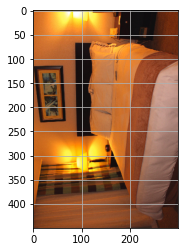

Green bboxes is ground-truth bbox. Others are positive anchors


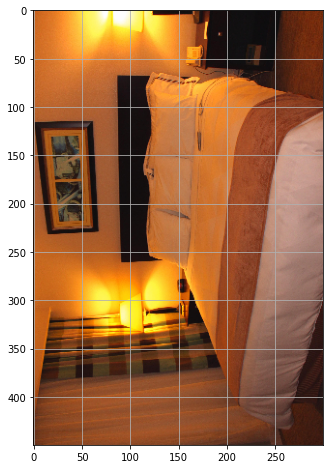

In [ ]:
print('Original image: height=%d width=%d'%(image_data['height'], image_data['width']))
print('Resized image:  height=%d width=%d c.im_size=%d'%(X.shape[1], X.shape[2], c.im_size))
print('Feature map size: height=%d width=%d c.rpn_stride=%d'%(Y[0].shape[1], Y[0].shape[2], c.rpn_stride))
print(X.shape)
print(str(len(Y))+" includes 'y_rpn_cls' and 'y_rpn_regr'")
print('Shape of y_rpn_cls {}'.format(Y[0].shape))
print('Shape of y_rpn_regr {}'.format(Y[1].shape))
print(image_data)

print('Number of positive anchors for this image: %d' % (debug_num_pos))
if debug_num_pos==0:
    gt_x1, gt_x2 = image_data['bboxes'][0]['x1']*(X.shape[2]/image_data['height']), image_data['bboxes'][0]['x2']*(X.shape[2]/image_data['height'])
    gt_y1, gt_y2 = image_data['bboxes'][0]['y1']*(X.shape[1]/image_data['width']), image_data['bboxes'][0]['y2']*(X.shape[1]/image_data['width'])
    gt_x1, gt_y1, gt_x2, gt_y2 = int(gt_x1), int(gt_y1), int(gt_x2), int(gt_y2)

    img = debug_img.copy()
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    color = (0, 255, 0)
    cv2.putText(img, 'gt bbox', (gt_x1, gt_y1-5), cv2.FONT_HERSHEY_DUPLEX, 0.7, color, 1)
    cv2.rectangle(img, (gt_x1, gt_y1), (gt_x2, gt_y2), color, 2)
    cv2.circle(img, (int((gt_x1+gt_x2)/2), int((gt_y1+gt_y2)/2)), 3, color, -1)

    plt.grid()
    plt.imshow(img)
    plt.show()
else:
    cls = Y[0][0]
    pos_cls = np.where(cls==1)
    print(pos_cls)
    regr = Y[1][0]
    pos_regr = np.where(regr==1)
    print(pos_regr)
    print('y_rpn_cls for possible pos anchor: {}'.format(cls[pos_cls[0][0],pos_cls[1][0],:]))
    print('y_rpn_regr for positive anchor: {}'.format(regr[pos_regr[0][0],pos_regr[1][0],:]))

    gt_x1, gt_x2 = image_data['bboxes'][0]['x1']*(X.shape[2]/image_data['width']), image_data['bboxes'][0]['x2']*(X.shape[2]/image_data['width'])
    gt_y1, gt_y2 = image_data['bboxes'][0]['y1']*(X.shape[1]/image_data['height']), image_data['bboxes'][0]['y2']*(X.shape[1]/image_data['height'])
    gt_x1, gt_y1, gt_x2, gt_y2 = int(gt_x1), int(gt_y1), int(gt_x2), int(gt_y2)

    img = debug_img.copy()
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    color = (0, 255, 0)
    #   cv2.putText(img, 'gt bbox', (gt_x1, gt_y1-5), cv2.FONT_HERSHEY_DUPLEX, 0.7, color, 1)
    cv2.rectangle(img, (gt_x1, gt_y1), (gt_x2, gt_y2), color, 2)
    cv2.circle(img, (int((gt_x1+gt_x2)/2), int((gt_y1+gt_y2)/2)), 3, color, -1)

    # Add text
    textLabel = 'gt bbox'
    (retval,baseLine) = cv2.getTextSize(textLabel,cv2.FONT_HERSHEY_COMPLEX,0.5,1)
    textOrg = (gt_x1, gt_y1+5)
    cv2.rectangle(img, (textOrg[0] - 5, textOrg[1]+baseLine - 5), (textOrg[0]+retval[0] + 5, textOrg[1]-retval[1] - 5), (0, 0, 0), 2)
    cv2.rectangle(img, (textOrg[0] - 5,textOrg[1]+baseLine - 5), (textOrg[0]+retval[0] + 5, textOrg[1]-retval[1] - 5), (255, 255, 255), -1)
    cv2.putText(img, textLabel, textOrg, cv2.FONT_HERSHEY_DUPLEX, 0.5, (0, 0, 0), 1)

    # Draw positive anchors according to the y_rpn_regr
    for i in range(debug_num_pos):

        color = (100+i*(155/4), 0, 100+i*(155/4))

        idx = pos_regr[2][i*4]/4
        anchor_size = c.anchor_box_scales[int(idx/3)]
        anchor_ratio = c.anchor_box_ratios[2-int((idx+1)%3)]

        center = (pos_regr[1][i*4]*c.rpn_stride, pos_regr[0][i*4]*c.rpn_stride)
        print('Center position of positive anchor: ', center)
        cv2.circle(img, center, 3, color, -1)
        anc_w, anc_h = anchor_size*anchor_ratio[0], anchor_size*anchor_ratio[1]
        cv2.rectangle(img, (center[0]-int(anc_w/2), center[1]-int(anc_h/2)), (center[0]+int(anc_w/2), center[1]+int(anc_h/2)), color, 2)
#         cv2.putText(img, 'pos anchor bbox '+str(i+1), (center[0]-int(anc_w/2), center[1]-int(anc_h/2)-5), cv2.FONT_HERSHEY_DUPLEX, 0.5, color, 1)

print('Green bboxes is ground-truth bbox. Others are positive anchors')
plt.figure(figsize=(8,8))
plt.grid()
plt.imshow(img)
plt.show()

In [ ]:
input_shape_img = (None, None, 3)

img_input = Input(shape=input_shape_img)
roi_input = Input(shape=(None, 4))

# define the base network (VGG here, can be Resnet50, Inception, etc)
print('img_input : ',img_input)
shared_layers = nn_base(img_input, trainable=True)
print('shared_layers : ',shared_layers)

img_input :  KerasTensor(type_spec=TensorSpec(shape=(None, None, None, 3), dtype=tf.float32, name='input_3'), name='input_3', description="created by layer 'input_3'")
shared_layers :  KerasTensor(type_spec=TensorSpec(shape=(None, None, None, 512), dtype=tf.float32, name=None), name='block5_conv3/Relu:0', description="created by layer 'block5_conv3'")


In [ ]:
# define the RPN, built on the base layers
num_anchors = len(c.anchor_box_scales) * len(c.anchor_box_ratios) # 9
rpn = rpn_layer(shared_layers, num_anchors)
print('rpn : ',rpn)
classifier = classifier_layer(shared_layers, roi_input, c.num_rois, nb_classes=len(classes_count))
print('roi_input  : ',roi_input)
print('c.num_rois : ',c.num_rois)
print('len(classes_count) : ',len(classes_count))
print('img_input : ',img_input)
print('rpn[:2] : ',rpn[:2])
#https://www.tensorflow.org/api_docs/python/tf/keras/Model
model_rpn = Model(img_input, rpn[:2])
print('model_rpn : ',model_rpn)
print('###########################################################################################')
print('classifier : ',classifier)
model_classifier = Model([img_input, roi_input], classifier)
print('model_classifier : ',model_classifier)

rpn :  [<KerasTensor: shape=(None, None, None, 9) dtype=float32 (created by layer 'rpn_out_class')>, <KerasTensor: shape=(None, None, None, 36) dtype=float32 (created by layer 'rpn_out_regress')>, <KerasTensor: shape=(None, None, None, 512) dtype=float32 (created by layer 'block5_conv3')>]
roi_input  :  KerasTensor(type_spec=TensorSpec(shape=(None, None, 4), dtype=tf.float32, name='input_4'), name='input_4', description="created by layer 'input_4'")
c.num_rois :  4
len(classes_count) :  4
img_input :  KerasTensor(type_spec=TensorSpec(shape=(None, None, None, 3), dtype=tf.float32, name='input_3'), name='input_3', description="created by layer 'input_3'")
rpn[:2] :  [<KerasTensor: shape=(None, None, None, 9) dtype=float32 (created by layer 'rpn_out_class')>, <KerasTensor: shape=(None, None, None, 36) dtype=float32 (created by layer 'rpn_out_regress')>]
model_rpn :  <keras.engine.functional.Functional object at 0x7fd4bcdfc1d0>
##############################################################

In [ ]:
# this is a model that holds both the RPN and the classifier, used to load/save weights for the models
model_all = Model([img_input, roi_input], rpn[:2] + classifier)

# Because the google colab can only run the session several hours one time (then you need to connect again), 
# we need to save the model and load the model to continue training
print('model_all : ',model_all)

model_all :  <keras.engine.functional.Functional object at 0x7fd4bcf21b90>


In [ ]:
type(c.model_path)
#/Faster_R-CNN/MyDrive/faster_RCNN/model_frcnn_vgg.hdf5

str

In [ ]:
# kernel_h5='/Faster_R-CNN/MyDrive/faster_RCNN/vgg16_weights_tf_dim_ordering_tf_kernels.h5'
# print('os.path.isfile(kernel_h5) :   ',os.path.isfile(kernel_h5))
# print('kernel_h5 :    ',kernel_h5)
# model_rpn.save_weights('kernel_h5')
# #model_rpn.load_weights('kernel_h5')


# hdf5_path='/Faster_R-CNN/MyDrive/faster_RCNN/model_frcnn_vgg.hdf5'
# model_classifier.save_weights('hdf5_path')
# #model_classifier.load_weights('hdf5_path')

In [ ]:
if not os.path.isfile(c.model_path):
    #If this is the begin of the training, load the pre-traind base network such as vgg-16
    try:
        print('This is the first time of your training')
        print('loading weights from {}'.format(c.model_path))
        print('1111111111111111111111111111111111111111111111111111111111111111111111111111111')
        #https://www.reddit.com/r/tensorflow/comments/iloxjl/difference_between_load_and_load_weights_in_keras/
        #https://dzone.com/articles/quick-hdf5-pandas
        # if you plan to use a trained model in inference mode only, or you want to use it for transfer learning, 
        #load_weights is perfectly fine, since you won't need the state of the optimizer.
        model_rpn.load_weights(c.model_path, by_name=True)
        print('2222222222222222222222222222222222222222222222222222222222222222222222222222222')
        #https://stackoverflow.com/questions/47266383/save-and-load-weights-in-keras 
        model_classifier.load_weights(c.model_path, by_name=True)
        print('3333333333333333333333333333333333333333333333333333333333333333333333333333333')
    except:
        print('Exception : \n',e)
        print('Could not load pretrained model weights. Weights can be found in the keras application folder \
https://github.com/fchollet/keras/tree/master/keras/applications')
    # Create the record.csv file to record losses, acc and mAP
    record_df = pd.DataFrame(columns=['mean_overlapping_bboxes', 'class_acc', 'loss_rpn_cls', 'loss_rpn_regr', 'loss_class_cls', 'loss_class_regr', 'curr_loss', 'elapsed_time', 'mAP'])
else:
    # If this is a continued training, load the trained model from before
    print('Continue training based on previous trained model')
    print('Loading weights from {}'.format(c.model_path))
    # with h5py.File('test.hdf5', 'w') as f: 
    #   dset = f.create_dataset("model_path", data = model_rpn)
    #https://stackoverflow.com/questions/47266383/save-and-load-weights-in-keras
    model_rpn.load_weights(c.model_path, by_name=True)
    model_classifier.load_weights(c.model_path, by_name=True)

    # Load the records
    record_df = pd.DataFrame(columns=['mean_overlapping_bboxes', 'class_acc', 'loss_rpn_cls', 'loss_rpn_regr', 'loss_class_cls', 'loss_class_regr', 'curr_loss', 'elapsed_time', 'mAP'])


    r_mean_overlapping_bboxes = record_df['mean_overlapping_bboxes']
    r_class_acc = record_df['class_acc']
    r_loss_rpn_cls = record_df['loss_rpn_cls']
    r_loss_rpn_regr = record_df['loss_rpn_regr']
    r_loss_class_cls = record_df['loss_class_cls']
    r_loss_class_regr = record_df['loss_class_regr']
    r_curr_loss = record_df['curr_loss']
    r_elapsed_time = record_df['elapsed_time']
    r_mAP = record_df['mAP']

    print('Already train %dK batches'% (len(record_df)))

Continue training based on previous trained model
Loading weights from /Faster_R-CNN/MyDrive/voc.hdf5
Already train 0K batches


In [ ]:
#BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB
optimizer = Adam(lr=1e-5)
optimizer_classifier = Adam(lr=1e-5)
model_rpn.compile(optimizer=optimizer, loss=[rpn_loss_cls(num_anchors), rpn_loss_regr(num_anchors)])
model_classifier.compile(optimizer=optimizer_classifier, loss=[class_loss_cls, class_loss_regr(len(classes_count)-1)], metrics={'dense_class_{}'.format(len(classes_count)): 'accuracy'})
model_all.compile(optimizer='sgd', loss='mae')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
record_df

,mean_overlapping_bboxes,class_acc,loss_rpn_cls,loss_rpn_regr,loss_class_cls,loss_class_regr,curr_loss,elapsed_time,mAP


In [ ]:
# Training setting
total_epochs = len(record_df)
r_epochs = len(record_df)

epoch_length = 100
num_epochs = 7
iter_num = 0

total_epochs += num_epochs

losses = np.zeros((epoch_length, 5))
rpn_accuracy_rpn_monitor = []
rpn_accuracy_for_epoch = []

if len(record_df)==0:
    best_loss = np.Inf
else:
    best_loss = np.min(r_curr_loss)

In [ ]:
print(len(record_df))

0


In [ ]:
# understandinggggggggggggggggggggggggggggggggggggggg
# Generate X (x_img) and label Y ([y_rpn_cls, y_rpn_regr])
######X, Y, img_data, debug_img, debug_num_pos = next(data_gen_train)

In [ ]:
######type(X[0][1][1][1])

In [ ]:
#######type(Y[0][0][0][0])

In [ ]:
#https://www.annytab.se/faster-r-cnn-objektdetektering-i-python/
start_time = time.time()
for epoch_num in range(num_epochs):

    progbar = generic_utils.Progbar(epoch_length)
    print('Epoch {}/{}'.format(r_epochs + 1, total_epochs))
    
    r_epochs += 1

    while True:
        try:
            #####################print('#############################################  epoch_num : ',epoch_num)
            if len(rpn_accuracy_rpn_monitor) == epoch_length and c.verbose:
                mean_overlapping_bboxes = float(sum(rpn_accuracy_rpn_monitor))/len(rpn_accuracy_rpn_monitor)
                rpn_accuracy_rpn_monitor = []
#                 print('Average number of overlapping bounding boxes from RPN = {} for {} previous iterations'.format(mean_overlapping_bboxes, epoch_length))
                if mean_overlapping_bboxes == 0:
                    print('RPN is not producing bounding boxes that overlap the ground truth boxes. Check RPN settings or keep training.')

            # Generate X (x_img) and label Y ([y_rpn_cls, y_rpn_regr])
            X, Y, img_data, debug_img, debug_num_pos = next(data_gen_train)

            #print('type(X) : ',type(X),'   type(Y)',Y)

            # Train rpn model and get loss value [_, loss_rpn_cls, loss_rpn_regr]
            loss_rpn = model_rpn.train_on_batch(X, Y)
            # Get predicted rpn from rpn model [rpn_cls, rpn_regr]
            P_rpn = model_rpn.predict_on_batch(X)

            # R: bboxes (shape=(300,4))
            # Convert rpn layer to roi bboxes
            R = rpn_to_roi(P_rpn[0], P_rpn[1], c, K.image_data_format() , use_regr=True, overlap_thresh=0.7, max_boxes=300)
            
            ####print('111111111111111111111111111111111111111111111')
            # note: calc_iou converts from (x1,y1,x2,y2) to (x,y,w,h) format
            # X2: bboxes that iou > C.classifier_min_overlap for all gt bboxes in 300 non_max_suppression bboxes
            # Y1: one hot code for bboxes from above => x_roi (X)
            # Y2: corresponding labels and corresponding gt bboxes
            X2, Y1, Y2, IouS = calc_iou(R, img_data, c, class_mapping)
            ####print('222222222222222222222222222222222222222222222')

            # If X2 is None means there are no matching bboxes
            if X2 is None:
                rpn_accuracy_rpn_monitor.append(0)
                rpn_accuracy_for_epoch.append(0)
                continue
            
            # Find out the positive anchors and negative anchors
            neg_samples = np.where(Y1[0, :, -1] == 1)
            pos_samples = np.where(Y1[0, :, -1] == 0)
            ###print('333333333333333333333333333333333333333333333')

            if len(neg_samples) > 0:
                neg_samples = neg_samples[0]
            else:
                neg_samples = []

            if len(pos_samples) > 0:
                pos_samples = pos_samples[0]
            else:
                pos_samples = []

            rpn_accuracy_rpn_monitor.append(len(pos_samples))
            rpn_accuracy_for_epoch.append((len(pos_samples)))
            ###print('4444444444444444444444444444444444444444444444444')

            if c.num_rois > 1:
                # If number of positive anchors is larger than 4//2 = 2, randomly choose 2 pos samples
                if len(pos_samples) < c.num_rois//2:
                    selected_pos_samples = pos_samples.tolist()
                else:
                    selected_pos_samples = np.random.choice(pos_samples, c.num_rois//2, replace=False).tolist()
                
                # Randomly choose (num_rois - num_pos) neg samples
                try:
                    selected_neg_samples = np.random.choice(neg_samples, c.num_rois - len(selected_pos_samples), replace=False).tolist()
                except:
                    selected_neg_samples = np.random.choice(neg_samples, c.num_rois - len(selected_pos_samples), replace=True).tolist()
                
                # Save all the pos and neg samples in sel_samples
                sel_samples = selected_pos_samples + selected_neg_samples
            else:
                # in the extreme case where num_rois = 1, we pick a random pos or neg sample
                selected_pos_samples = pos_samples.tolist()
                selected_neg_samples = neg_samples.tolist()
                if np.random.randint(0, 2):
                    sel_samples = random.choice(neg_samples)
                else:
                    sel_samples = random.choice(pos_samples)

            ###print('5555555555555555555555555555555555555555555555555555')
            # training_data: [X, X2[:, sel_samples, :]]
            # labels: [Y1[:, sel_samples, :], Y2[:, sel_samples, :]]
            #  X                     => img_data resized image
            #  X2[:, sel_samples, :] => num_rois (4 in here) bboxes which contains selected neg and pos
            #  Y1[:, sel_samples, :] => one hot encode for num_rois bboxes which contains selected neg and pos
            #  Y2[:, sel_samples, :] => labels and gt bboxes for num_rois bboxes which contains selected neg and pos

            X=np.float64(X)
            X2=np.float64(X2)
            Y1=np.float64(Y1)
            Y2=np.float64(Y2)
            # print('X.dtype : ',X.dtype)
            # print('X2.dtype : ',X2.dtype)
            # print('Y1.dtype : ',Y1.dtype)
            # print('Y2.dtype : ',Y2.dtype)
            loss_class = model_classifier.train_on_batch([X, X2[:, sel_samples, :]], [Y1[:, sel_samples, :], Y2[:, sel_samples, :]])
            

            ###print('66666666666666666666666666666666666666666666666666666')
            losses[iter_num, 0] = loss_rpn[1]
            losses[iter_num, 1] = loss_rpn[2]

            losses[iter_num, 2] = loss_class[1]
            losses[iter_num, 3] = loss_class[2]
            losses[iter_num, 4] = loss_class[3]

            iter_num += 1
            ###print('7777777777777777777777777777777777777777777777777777')

            progbar.update(iter_num, [('rpn_cls', np.mean(losses[:iter_num, 0])), ('rpn_regr', np.mean(losses[:iter_num, 1])),
                                      ('final_cls', np.mean(losses[:iter_num, 2])), ('final_regr', np.mean(losses[:iter_num, 3]))])

            ###print('8888888888888888888888888888888888888888888888888888')
            if iter_num == epoch_length:
                loss_rpn_cls = np.mean(losses[:, 0])
                loss_rpn_regr = np.mean(losses[:, 1])
                loss_class_cls = np.mean(losses[:, 2])
                loss_class_regr = np.mean(losses[:, 3])
                class_acc = np.mean(losses[:, 4])
                ###print('9999999999999999999999999999999999999999999999')

                mean_overlapping_bboxes = float(sum(rpn_accuracy_for_epoch)) / len(rpn_accuracy_for_epoch)
                rpn_accuracy_for_epoch = []

                if c.verbose:
                    print('Mean number of bounding boxes from RPN overlapping ground truth boxes: {}'.format(mean_overlapping_bboxes))
                    print('Classifier accuracy for bounding boxes from RPN: {}'.format(class_acc))
                    print('Loss RPN classifier: {}'.format(loss_rpn_cls))
                    print('Loss RPN regression: {}'.format(loss_rpn_regr))
                    print('Loss Detector classifier: {}'.format(loss_class_cls))
                    print('Loss Detector regression: {}'.format(loss_class_regr))
                    print('Total loss: {}'.format(loss_rpn_cls + loss_rpn_regr + loss_class_cls + loss_class_regr))
                    print('Elapsed time: {}'.format(time.time() - start_time))
                    elapsed_time = (time.time()-start_time)/60

                ###print('10101010101010101010101010101010101010101010101010101010101010')
                curr_loss = loss_rpn_cls + loss_rpn_regr + loss_class_cls + loss_class_regr
                iter_num = 0
                start_time = time.time()

                if curr_loss < best_loss:
                    if c.verbose:
                        print('Total loss decreased from {} to {}, saving weights'.format(best_loss,curr_loss))
                    best_loss = curr_loss
                    model_all.save_weights(c.model_path)

                new_row = {'mean_overlapping_bboxes':round(mean_overlapping_bboxes, 3), 
                           'class_acc':round(class_acc, 3), 
                           'loss_rpn_cls':round(loss_rpn_cls, 3), 
                           'loss_rpn_regr':round(loss_rpn_regr, 3), 
                           'loss_class_cls':round(loss_class_cls, 3), 
                           'loss_class_regr':round(loss_class_regr, 3), 
                           'curr_loss':round(curr_loss, 3), 
                           'elapsed_time':round(elapsed_time, 3), 
                           'mAP': 0}

                record_df = record_df.append(new_row, ignore_index=True)
                #record_df.to_csv(record_path, index=0)

                break

        except Exception as e:
            print('Exception is in last')
            print('Exception: {}'.format(e))
            continue

print('Training complete, exiting.')

Epoch 1/7
100/100 [==============================] - 116s 1s/step - rpn_cls: 5.5134 - rpn_regr: 0.3980 - final_cls: 1.1795 - final_regr: 0.4289
Mean number of bounding boxes from RPN overlapping ground truth boxes: 4.635869565217392
Classifier accuracy for bounding boxes from RPN: 0.5925
Loss RPN classifier: 5.102937447987497
Loss RPN regression: 0.3903373625315726
Loss Detector classifier: 1.1389162889122963
Loss Detector regression: 0.4007060627639294
Total loss: 7.032897162195295
Elapsed time: 115.6930422782898
Total loss decreased from inf to 7.032897162195295, saving weights
Epoch 2/7
100/100 [==============================] - 79s 789ms/step - rpn_cls: 4.3146 - rpn_regr: 0.3058 - final_cls: 1.1430 - final_regr: 0.4241
Mean number of bounding boxes from RPN overlapping ground truth boxes: 5.570652173913044
Classifier accuracy for bounding boxes from RPN: 0.5775
Loss RPN classifier: 4.370120775637916
Loss RPN regression: 0.3442333925142884
Loss Detector classifier: 1.13667323499918


In [ ]:
#X=np.float64(X)
#X.dtype

In [ ]:
# #https://www.annytab.se/faster-r-cnn-objektdetektering-i-python/

# # **************************   For Example    *****************************************

# # The main entry point for this module
# def main():
#     # Create configuration
#     config = common.Config()
#     config.annotations_file_path = 'C:\\DATA\\Python-data\\open-images-v5\\imgs\\train_annotations.csv'
#     config.img_base_path = 'C:\\DATA\\Python-data\\open-images-v5\\imgs\\'
#     config.pretrained_model_path = 'C:\\DATA\\Python-data\\open-images-v5\\frcnn\\vgg16_weights_tf_dim_ordering_tf_kernels.h5'
#     config.model_path = 'C:\\DATA\\Python-data\\open-images-v5\\frcnn\\training_model.h5'
#     config.records_path = 'C:\\DATA\\Python-data\\open-images-v5\\frcnn\\records.csv'